### 한강공원 크롤링
1. 광나루
2. 잠실

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from bs4 import BeautifulSoup
import urllib.request as req
from urllib import parse 
import time

In [3]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

In [4]:
month=pd.read_csv('../ws/data/서울시 한강공원 월별 이용객 현황.csv', encoding='euc-kr')
month.head(20)

,현황 일련번호,공원 코드,공원명,공원 시명,공원 구명,공원 지번 주소,공원 도로명 주소,등록자 일련번호,등록 일시,수정자 일련번호,...,강변물놀이장,강변프롬나드,난지 하늘다리,갈대숲탐장로,꿀벌숲,치유의숲,그라스정원,노들섬,습지생태공원,현황 일시
0,87623,Hzone001,광나루한강공원,서울,강동구,암사동 637-6,선사로 83-106,83,2024-03-08 10:40:48.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
1,87629,Hzone006,이촌한강공원,서울,용산구,이촌동 302-17,이촌로72길 62,83,2024-03-08 14:14:33.0,NaN,...,0,0,0,0,0,0,0,19198,0,2024-02-29 00:00:00.0
2,87626,Hzone003,뚝섬한강공원,서울,광진구,자양동 427-1,강변북로 2273,83,2024-03-08 11:29:41.0,83.0,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
3,87625,Hzone002,잠실한강공원,서울,송파구,잠실동 1-1,한가람로 65,83,2024-03-08 10:44:40.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
4,87631,Hzone008,양화한강공원,서울,영등포구,당산동 98-1,노들로 221,83,2024-03-08 14:40:51.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
5,87633,Hzone010,망원한강공원,서울,마포구,망원동 205-4,마포나루길 467,83,2024-03-08 15:08:42.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
6,87628,Hzone005,반포한강공원,서울,서초구,반포동 115-5,신반포로11길 40,83,2024-03-08 13:58:43.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0
7,87627,Hzone004,잠원한강공원,서울,강남구,압구정동 386-1,강남대로 708,83,2024-03-08 13:56:33.0,NaN,...,0,0,0,0,5315,9380,21285,0,0,2024-02-29 00:00:00.0
8,87635,Hzone011,강서한강공원,서울,강서구,방화동 47,양천로27길 279-23,83,2024-03-08 15:19:07.0,NaN,...,0,0,0,0,0,0,0,0,7532,2024-02-29 00:00:00.0
9,87630,Hzone007,여의도한강공원,서울,영등포구,여의도동 85-1,여의동로 280,83,2024-03-08 14:18:31.0,NaN,...,0,0,0,0,0,0,0,0,0,2024-02-29 00:00:00.0


In [5]:
month=month[['현황 일시','공원 코드','공원명','일반이용자(아침)','일반이용자(낮)','일반이용자(저녁)']]

In [6]:
month.head(30)

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
0,2024-02-29 00:00:00.0,Hzone001,광나루한강공원,2840.0,33780,25450
1,2024-02-29 00:00:00.0,Hzone006,이촌한강공원,5145.0,47990,37857
2,2024-02-29 00:00:00.0,Hzone003,뚝섬한강공원,13100.0,167450,187420
3,2024-02-29 00:00:00.0,Hzone002,잠실한강공원,9820.0,41340,49010
4,2024-02-29 00:00:00.0,Hzone008,양화한강공원,11150.0,33940,32050
5,2024-02-29 00:00:00.0,Hzone010,망원한강공원,12510.0,20520,58457
6,2024-02-29 00:00:00.0,Hzone005,반포한강공원,20965.0,102300,146595
7,2024-02-29 00:00:00.0,Hzone004,잠원한강공원,29360.0,29720,7220
8,2024-02-29 00:00:00.0,Hzone011,강서한강공원,3966.0,15103,4355
9,2024-02-29 00:00:00.0,Hzone007,여의도한강공원,3150.0,23920,29360


In [7]:
# 사이트 주소
base_url='https://data.seoul.go.kr/SeoulRtd/?hotspotNm='
gwang='광나루한강공원'
jamsil='잠실한강공원'
gwang_url=base_url+parse.quote(gwang)
jam_url=base_url+parse.quote(gwang)
gwang_res=req.urlopen(gwang_url)
jam_res=req.urlopen(jam_url)

soup=BeautifulSoup(gwang_res, "html.parser")
print(soup)

<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="width=device-width, initial-scale=1.0, user-scalable=0, minimal-ui" name="viewport"/>
<meta content="서울시 실시간 도시데이터" name="description"/>
<meta content="" name="author"/>
<title>서울시 실시간 도시데이터</title>
<link href="/SeoulRtd/images/logo/favicon.ico" rel="shortcut icon"/>
<link href="/SeoulRtd/images/logo/favicon.ico" rel="apple-touch-icon"/>
<link href="https://fonts.googleapis.com" rel="preconnect"/>
<link crossorigin="" href="https://fonts.gstatic.com" rel="preconnect"/>
<link href="https://fonts.googleapis.com/css2?family=Noto+Sans+KR:wght@400;700&amp;display=swap" rel="stylesheet"/>
<link href="https://fonts.googleapis.com/icon?family=Material+Icons" rel="stylesheet"/>
<script src="/SeoulRtd/js/tailwindcss-3.1.3.min.js"></script>
<script>
        tailwind.config = {  theme: {  extend: {  colors: {	keycolor: '#577de0'  

In [8]:
soup.select_one('#report_home div:nth-child(1) > div.report_home_msg.text-black.text-center.grow > b').text



'정보없음'

In [9]:
# import requests

# url=f'http://openapi.seoul.go.kr:8088/{apikey}/json/{service_name}/1/1000'

# res = requests.get(url)
# # res.encoding='utf-8'
# # print(res.status_code)
# data = res.json()
#     # 데이터 처리
# if service_name in data:
#         items = data[service_name]['row']
#         for item in items:
#             print(item)  # 각 항목 출력. 필요에 따라 특정 필드만 출력하도록 수정 가능
# else:
#         print(f"'{service_name}' 키를 찾을 수 없습니다. 응답 구조:", data)

# # for i in data:
# #     print(i)

In [10]:
# service_name='citydata'
# apikey='6c6c71567a6a777334306a617a705a'
# place='광나루한강공원'
# datas=[]
# url=f'http://openapi.seoul.go.kr:8088/{apikey}/xml/{service_name}/1/1000/{place}'
# res = requests.get(url)
# # res.encoding='utf-8'
# # print(res.status_code)
# data = res.json()
#         # 데이터 처리
# items = soup.find_all("citydata")
# if item in items:
#         area_nm = item.find("area_nm").get_text() # 장소명
#         live_ppltn_stts = item.find("live_ppltn_stts").get_text() # 실시간 인구현황
#         area_congest_lvl = item.find("area_congest_lvl").get_text() # 장소 혼잡도 지표
#         area_congest_msg = item.find("area_congest_msg").get_text() # 장소 혼잡도 지표 관련 메세지
#         road_traffic_idx = item.find("road_traffic_idx").get_text() #전체 도로 소통 평균 현황
        
#         data = [area_nm, live_ppltn_stts, area_congest_lvl, area_congest_msg, road_traffic_idx]
#         datas.append(data)        
# else:
#         print(f"'{service_name}' 키를 찾을 수 없습니다. 응답 구조:", data)

# print[datas]

In [11]:
park=pd.read_csv('../ws/data/한강공원 주차장 일별 이용 현황.csv',encoding='euc-kr')
park.head()

,지구별,주차장명,주차대수,이용시간,날짜
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10
1,PLT-011,잠실1주차장,1059,66361,2024/11/10
2,PLT-001,강서1주차장,329,26875,2024/11/10
3,PLT-008,여의도5주차장,229,22509,2024/11/10
4,PLT-008,여의도2주차장,1934,150135,2024/11/10


In [12]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   지구별     45277 non-null  object
 1   주차장명    45277 non-null  object
 2   주차대수    45277 non-null  int64 
 3   이용시간    45277 non-null  int64 
 4   날짜      45277 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.7+ MB


In [13]:
month_sum=month.pivot_table(
                            ['일반이용자(아침)',	'일반이용자(낮)',	'일반이용자(저녁)'],
                            index=['현황 일시','공원명'],
                            aggfunc='sum'
)
month_sum.head(30)

일반이용자(낮)  일반이용자(아침)  일반이용자(저녁)
현황 일시                 공원명                                    
2018-01-01 00:00:00.0 강서한강공원      29174     2329.0      17230
2018-01-31 00:00:00.0 광나루한강공원     71260    17720.0      30830
                      난지한강공원      97665    16635.0      34690
                      뚝섬한강공원     449660    44450.0     129590
                      망원한강공원      39603     2819.0      28697
                      반포한강공원      91924    12902.0      56107
                      양화한강공원      37975     3860.0      18209
                      여의도한강공원    100690    17920.0     113010
                      이촌한강공원      43950     6070.0      28340
                      잠실한강공원      53510    12700.0      45450
                      잠원한강공원      47314     6156.0      21075
2018-02-01 00:00:00.0 강서한강공원      30168     2555.0      18457
                      뚝섬한강공원     395030    39930.0     124330
2018-02-28 00:00:00.0 광나루한강공원     70195    15830.0      33300
                      난지한강공원      81510    19600.0      39420
                      망원한강공원      39801     2326.0      28333
                      반포한강공원      80850    11857.0      52799
                      양화한강공원      34135     3394.0      15941
                      여의도한강공원     40500    21265.0      45510
                      이촌한강공원      45630     6110.0      26300
                      잠실한강공원      50630    10980.0      44195
                      잠원한강공원      41450     5983.0      19062
2018-03-01 00:00:00.0 뚝섬한강공원     519520    52110.0     143030
2018-03-15 00:00:00.0 강서한강공원      43455     3308.0      22302
2018-03-31 00:00:00.0 광나루한강공원    107040    23980.0      45085
                      난지한강공원      89150    28110.0      43885
                      망원한강공원      68631     3508.0      44538
                      반포한강공원     226055    15669.0     117317
                      양화한강공원      48371     4108.0      25290
                      여의도한강공원    116142    17345.0     117665

In [14]:
park_sum=park.pivot_table(
                            ['주차대수','이용시간'],
                            index=['날짜','지구별','주차장명'],
                            aggfunc='sum'
)
park_sum.tail(50)

이용시간  주차대수
날짜         지구별     주차장명                    
2024/11/09 PLT-004 이촌3주차장      116327  1387
           PLT-005 뚝섬1주차장       24253   300
                   뚝섬2주차장       91910   850
                   뚝섬3주차장       64831   649
                   뚝섬4주차장       91972   856
           PLT-006 광나루1,2주차장    87100   819
                   광나루3주차장      59959   715
                   광나루4주차장       9771    86
           PLT-007 양화1주차장       31024   354
                   양화2주차장        9013    83
                   양화3주차장      109282  1134
           PLT-008 여의도1주차장     324829  3229
                   여의도2주차장     113881  1648
                   여의도3주차장     122181  1209
                   여의도4주차장       3550    48
                   여의도5주차장      27294   210
           PLT-009 반포1주차장       69848  1170
                   반포2,3주차장    331038  3783
           PLT-010 잠원1주차장       70063   561
                   잠원2-6주차장    232477  2187
           PLT-011 잠실1주차장       59074  1288
                   잠실4주차장      136458  1551
2024/11/10 PLT-001 강서1주차장       26875   329
           PLT-002 난지1,2,3주차장  191212  2253
           PLT-003 망원1주차장       71554   574
                   망원2,3주차장    137106  1586
           PLT-004 이촌1주차장       11707   355
                   이촌2주차장       51737   541
                   이촌3주차장      159626  1727
           PLT-005 뚝섬1주차장       22891   273
                   뚝섬2주차장      108345   965
                   뚝섬3주차장       62848   686
                   뚝섬4주차장       79419   864
           PLT-006 광나루1,2주차장   107602  1014
                   광나루3주차장      98079  1029
                   광나루4주차장       8688   113
           PLT-007 양화1주차장       31676   384
                   양화2주차장       10081    88
                   양화3주차장      119160  1270
           PLT-008 여의도1주차장     355119  3398
                   여의도2주차장     150135  1934
                   여의도3주차장     318649  2326
                   여의도4주차장       1994    41
                   여의도5주차장      22509   229
           PLT-009 반포1주차장       72134  1174
                   반포2,3주차장    304262  3409
           PLT-010 잠원1주차장       41514   647
                   잠원2-6주차장    222123  2365
           PLT-011 잠실1주차장       66361  1059
                   잠실4주차장      120025  1409

In [15]:
park['date']=pd.to_datetime(park['날짜'])

In [16]:
park.head()

,지구별,주차장명,주차대수,이용시간,날짜,date
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10,2024-11-10
1,PLT-011,잠실1주차장,1059,66361,2024/11/10,2024-11-10
2,PLT-001,강서1주차장,329,26875,2024/11/10,2024-11-10
3,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10
4,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10


In [17]:
park.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45277 entries, 0 to 45276
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   지구별     45277 non-null  object        
 1   주차장명    45277 non-null  object        
 2   주차대수    45277 non-null  int64         
 3   이용시간    45277 non-null  int64         
 4   날짜      45277 non-null  object        
 5   date    45277 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 2.1+ MB


In [18]:
park['month']=park['date'].dt.month
park.head()

,지구별,주차장명,주차대수,이용시간,날짜,date,month
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10,2024-11-10,11
1,PLT-011,잠실1주차장,1059,66361,2024/11/10,2024-11-10,11
2,PLT-001,강서1주차장,329,26875,2024/11/10,2024-11-10,11
3,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11
4,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11


In [19]:
park['year']=park['date'].dt.year
park.head()

,지구별,주차장명,주차대수,이용시간,날짜,date,month,year
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10,2024-11-10,11,2024
1,PLT-011,잠실1주차장,1059,66361,2024/11/10,2024-11-10,11,2024
2,PLT-001,강서1주차장,329,26875,2024/11/10,2024-11-10,11,2024
3,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11,2024
4,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11,2024


In [20]:
park_sum=park.pivot_table(
                            ['주차대수','이용시간'],
                            index=['year','month','date','지구별','주차장명'],
                            aggfunc='sum'
)
park_sum.tail(50)

이용시간  주차대수
year month date       지구별     주차장명                    
2024 11    2024-11-09 PLT-004 이촌3주차장      116327  1387
                      PLT-005 뚝섬1주차장       24253   300
                              뚝섬2주차장       91910   850
                              뚝섬3주차장       64831   649
                              뚝섬4주차장       91972   856
                      PLT-006 광나루1,2주차장    87100   819
                              광나루3주차장      59959   715
                              광나루4주차장       9771    86
                      PLT-007 양화1주차장       31024   354
                              양화2주차장        9013    83
                              양화3주차장      109282  1134
                      PLT-008 여의도1주차장     324829  3229
                              여의도2주차장     113881  1648
                              여의도3주차장     122181  1209
                              여의도4주차장       3550    48
                              여의도5주차장      27294   210
                      PLT-009 반포1주차장       69848  1170
                              반포2,3주차장    331038  3783
                      PLT-010 잠원1주차장       70063   561
                              잠원2-6주차장    232477  2187
                      PLT-011 잠실1주차장       59074  1288
                              잠실4주차장      136458  1551
           2024-11-10 PLT-001 강서1주차장       26875   329
                      PLT-002 난지1,2,3주차장  191212  2253
                      PLT-003 망원1주차장       71554   574
                              망원2,3주차장    137106  1586
                      PLT-004 이촌1주차장       11707   355
                              이촌2주차장       51737   541
                              이촌3주차장      159626  1727
                      PLT-005 뚝섬1주차장       22891   273
                              뚝섬2주차장      108345   965
                              뚝섬3주차장       62848   686
                              뚝섬4주차장       79419   864
                      PLT-006 광나루1,2주차장   107602  1014
                              광나루3주차장      98079  1029
                              광나루4주차장       8688   113
                      PLT-007 양화1주차장       31676   384
                              양화2주차장       10081    88
                              양화3주차장      119160  1270
                      PLT-008 여의도1주차장     355119  3398
                              여의도2주차장     150135  1934
                              여의도3주차장     318649  2326
                              여의도4주차장       1994    41
                              여의도5주차장      22509   229
                      PLT-009 반포1주차장       72134  1174
                              반포2,3주차장    304262  3409
                      PLT-010 잠원1주차장       41514   647
                              잠원2-6주차장    222123  2365
                      PLT-011 잠실1주차장       66361  1059
                              잠실4주차장      120025  1409

### 지구별
PLT-001: 강서   
PLT-002: 난지   
PLT-003: 망원   
PLT-004: 이촌   
PLT-005: 뚝섬       
PLT-006: 광나루     
PLT-007: 양화   
PLT-008: 여의도     
PLT-009: 반포   
PLT-0010: 잠원  
PLT-0011: 잠실  

### 공원코드
Hzone011: 강서  
Hzone009: 난지  
Hzone010: 망원  
Hzone006: 이촌  
Hzone003: 뚝섬  
Hzone001 광나루     
Hzone008: 양화  
Hzone007: 여의도    
Hzone005: 반포  
Hzone004: 잠원  
Hzone002: 잠실  

In [21]:
month.head()

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
0,2024-02-29 00:00:00.0,Hzone001,광나루한강공원,2840.0,33780,25450
1,2024-02-29 00:00:00.0,Hzone006,이촌한강공원,5145.0,47990,37857
2,2024-02-29 00:00:00.0,Hzone003,뚝섬한강공원,13100.0,167450,187420
3,2024-02-29 00:00:00.0,Hzone002,잠실한강공원,9820.0,41340,49010
4,2024-02-29 00:00:00.0,Hzone008,양화한강공원,11150.0,33940,32050


In [22]:
month.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 815 entries, 0 to 814
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   현황 일시      815 non-null    object 
 1   공원 코드      815 non-null    object 
 2   공원명        815 non-null    object 
 3   일반이용자(아침)  812 non-null    float64
 4   일반이용자(낮)   815 non-null    int64  
 5   일반이용자(저녁)  815 non-null    int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 38.3+ KB


In [23]:
month['date']=pd.to_datetime(month['현황 일시'])
month.head()

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁),date
0,2024-02-29 00:00:00.0,Hzone001,광나루한강공원,2840.0,33780,25450,2024-02-29
1,2024-02-29 00:00:00.0,Hzone006,이촌한강공원,5145.0,47990,37857,2024-02-29
2,2024-02-29 00:00:00.0,Hzone003,뚝섬한강공원,13100.0,167450,187420,2024-02-29
3,2024-02-29 00:00:00.0,Hzone002,잠실한강공원,9820.0,41340,49010,2024-02-29
4,2024-02-29 00:00:00.0,Hzone008,양화한강공원,11150.0,33940,32050,2024-02-29


In [24]:
nov_24=park[(park['year']==2024)&(park['month']==10)]
nov_24

,지구별,주차장명,주차대수,이용시간,날짜,date,month,year
280,PLT-010,잠원2-6주차장,1697,175374,2024/10/31,2024-10-31,10,2024
281,PLT-007,양화1주차장,291,31722,2024/10/31,2024-10-31,10,2024
282,PLT-008,여의도2주차장,1842,184995,2024/10/31,2024-10-31,10,2024
283,PLT-009,반포1주차장,736,33439,2024/10/31,2024-10-31,10,2024
284,PLT-003,망원1주차장,306,33187,2024/10/31,2024-10-31,10,2024
...,...,...,...,...,...,...,...,...
1143,PLT-003,"망원2,3주차장",1690,150953,2024/10/01,2024-10-01,10,2024
1144,PLT-004,이촌2주차장,235,21743,2024/10/01,2024-10-01,10,2024
1145,PLT-004,"이촌3,4주차장",1012,84443,2024/10/01,2024-10-01,10,2024
1146,PLT-008,여의도5주차장,332,65287,2024/10/01,2024-10-01,10,2024


In [25]:
days=["평일", "평일", "평일", "평일", "금요일", "주말", "주말"]

park['요일']=park['date'].dt.weekday.map(dict(enumerate(days)))
park.head()

,지구별,주차장명,주차대수,이용시간,날짜,date,month,year,요일
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10,2024-11-10,11,2024,주말
1,PLT-011,잠실1주차장,1059,66361,2024/11/10,2024-11-10,11,2024,주말
2,PLT-001,강서1주차장,329,26875,2024/11/10,2024-11-10,11,2024,주말
3,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11,2024,주말
4,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11,2024,주말


In [26]:
# nov_24_sum=nov_24.pivot_table(
#                             ['주차대수','이용시간'],
#                             index=['year','month','요일','지구별','주차장명'],
#                             aggfunc='sum'
# )
# nov_24_sum.tail(50)

In [27]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

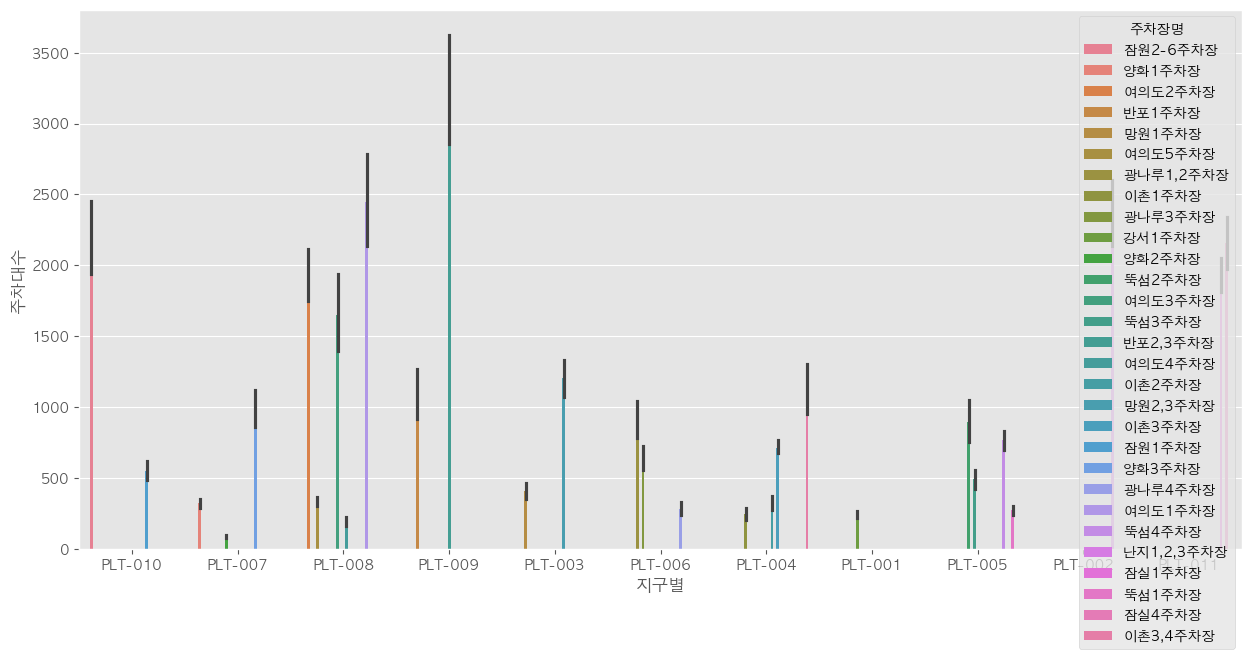

In [28]:
plt.style.use('ggplot')
plt.figure(figsize=(15,7))
sns.barplot(
    data=nov_24,
    x='지구별',
    y='주차대수',
    hue='주차장명'
)
plt.show()

In [29]:
sep_traffic=pd.read_excel('../ws/data/09월 서울시 교통량 조사자료(2024).xlsx',sheet_name=1)
sep_traffic.head()

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
0,20240901,일,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,474.0,355.0,280.0,200.0,...,1662.0,1706.0,1653.0,1572.0,1195.0,1090.0,972.0,965.0,782.0,503.0
1,20240902,월,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,322.0,195.0,153.0,153.0,...,1728.0,1806.0,1865.0,1888.0,1711.0,1401.0,1240.0,1092.0,991.0,676.0
2,20240903,화,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,474.0,335.0,236.0,169.0,...,1712.0,1846.0,1937.0,1929.0,1960.0,1612.0,1262.0,1209.0,1037.0,839.0
3,20240904,수,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,519.0,381.0,244.0,202.0,...,1768.0,2004.0,1847.0,2114.0,1861.0,1559.0,1283.0,1183.0,1019.0,751.0
4,20240905,목,성산로(금화터널),A-01,유입,봉원고가차도->독립문역,569.0,419.0,286.0,227.0,...,1723.0,1901.0,1949.0,2051.0,1699.0,1355.0,1243.0,1300.0,1165.0,850.0


In [30]:
sep_traffic[sep_traffic['지점명']=='잠실대교']
sep_traffic[sep_traffic['지점명']=='마포대교']

,일자,요일,지점명,지점번호,방향,구분,0시,1시,2시,3시,...,14시,15시,16시,17시,18시,19시,20시,21시,22시,23시
4080,20240901,일,마포대교,C-07,유입,마포대교남단->마포대교북단,1127.0,942.0,594.0,457.0,...,3181.0,3202.0,3058.0,2639.0,2515.0,2714.0,2715.0,2215.0,1682.0,1158.0
4081,20240902,월,마포대교,C-07,유입,마포대교남단->마포대교북단,699.0,464.0,414.0,262.0,...,3148.0,2976.0,3381.0,3910.0,3808.0,3407.0,3017.0,2611.0,1919.0,1525.0
4082,20240903,화,마포대교,C-07,유입,마포대교남단->마포대교북단,1186.0,740.0,538.0,442.0,...,3221.0,3146.0,3288.0,4067.0,3671.0,3323.0,3008.0,2862.0,2273.0,1724.0
4083,20240904,수,마포대교,C-07,유입,마포대교남단->마포대교북단,1262.0,874.0,572.0,453.0,...,3434.0,3226.0,3534.0,4033.0,3825.0,3252.0,3008.0,2688.0,2167.0,1691.0
4084,20240905,목,마포대교,C-07,유입,마포대교남단->마포대교북단,1277.0,972.0,643.0,512.0,...,3391.0,3358.0,3690.0,4095.0,4193.0,3504.0,3349.0,2666.0,2459.0,1594.0
4085,20240906,금,마포대교,C-07,유입,마포대교남단->마포대교북단,1193.0,936.0,571.0,522.0,...,3586.0,3527.0,3816.0,4013.0,4154.0,3280.0,2968.0,2782.0,2581.0,1844.0
4086,20240907,토,마포대교,C-07,유입,마포대교남단->마포대교북단,1388.0,890.0,759.0,641.0,...,3472.0,3719.0,3752.0,3200.0,2824.0,2766.0,3072.0,2609.0,2279.0,1575.0
4087,20240908,일,마포대교,C-07,유입,마포대교남단->마포대교북단,1142.0,847.0,586.0,435.0,...,3245.0,3061.0,3115.0,2852.0,2622.0,2762.0,2833.0,2206.0,1677.0,1120.0
4088,20240909,월,마포대교,C-07,유입,마포대교남단->마포대교북단,694.0,556.0,356.0,317.0,...,3407.0,3270.0,3317.0,3912.0,3744.0,3424.0,3063.0,2846.0,2411.0,1743.0
4089,20240910,화,마포대교,C-07,유입,마포대교남단->마포대교북단,1323.0,870.0,588.0,457.0,...,3352.0,3455.0,3784.0,4202.0,3956.0,3754.0,3374.0,2969.0,2576.0,1726.0


### 주요변수
- 지하철역/버스정류장 하차 인원
- 최저/최고기온

In [31]:
weather=pd.read_csv('../ws/data/서울날씨20-24.csv', encoding='euc-kr')
weather.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%)
0,108,서울,2020-01-14,-2.3,-5.7,637.0,2.6,1413,NaN,NaN,-13.0,45.3
1,108,서울,2020-01-15,-2.7,-6.4,722.0,2.2,1510,NaN,NaN,-13.4,44.8
2,108,서울,2020-01-16,-1.7,-5.5,816.0,3.2,1430,NaN,NaN,-13.0,43.0
3,108,서울,2020-01-17,-0.6,-4.8,720.0,4.9,1449,NaN,NaN,-11.7,43.9
4,108,서울,2020-01-18,0.3,-4.1,802.0,5.9,1503,NaN,NaN,-10.0,48.1


In [32]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1763 entries, 0 to 1762
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   지점             1763 non-null   int64  
 1   지점명            1763 non-null   object 
 2   일시             1763 non-null   object 
 3   평균기온(°C)       1763 non-null   float64
 4   최저기온(°C)       1762 non-null   float64
 5   최저기온 시각(hhmi)  1762 non-null   float64
 6   최고기온(°C)       1763 non-null   float64
 7   최고기온 시각(hhmi)  1763 non-null   int64  
 8   강수 계속시간(hr)    739 non-null    float64
 9   일강수량(mm)       740 non-null    float64
 10  평균 이슬점온도(°C)   1763 non-null   float64
 11  평균 상대습도(%)     1763 non-null   float64
dtypes: float64(8), int64(2), object(2)
memory usage: 165.4+ KB


In [33]:
weather['date']=pd.to_datetime(weather['일시'])
weather.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),date
0,108,서울,2020-01-14,-2.3,-5.7,637.0,2.6,1413,NaN,NaN,-13.0,45.3,2020-01-14
1,108,서울,2020-01-15,-2.7,-6.4,722.0,2.2,1510,NaN,NaN,-13.4,44.8,2020-01-15
2,108,서울,2020-01-16,-1.7,-5.5,816.0,3.2,1430,NaN,NaN,-13.0,43.0,2020-01-16
3,108,서울,2020-01-17,-0.6,-4.8,720.0,4.9,1449,NaN,NaN,-11.7,43.9,2020-01-17
4,108,서울,2020-01-18,0.3,-4.1,802.0,5.9,1503,NaN,NaN,-10.0,48.1,2020-01-18


In [34]:
weather['year']=weather['date'].dt.year
weather['month']=weather['date'].dt.month

weather.head()

,지점,지점명,일시,평균기온(°C),최저기온(°C),최저기온 시각(hhmi),최고기온(°C),최고기온 시각(hhmi),강수 계속시간(hr),일강수량(mm),평균 이슬점온도(°C),평균 상대습도(%),date,year,month
0,108,서울,2020-01-14,-2.3,-5.7,637.0,2.6,1413,NaN,NaN,-13.0,45.3,2020-01-14,2020,1
1,108,서울,2020-01-15,-2.7,-6.4,722.0,2.2,1510,NaN,NaN,-13.4,44.8,2020-01-15,2020,1
2,108,서울,2020-01-16,-1.7,-5.5,816.0,3.2,1430,NaN,NaN,-13.0,43.0,2020-01-16,2020,1
3,108,서울,2020-01-17,-0.6,-4.8,720.0,4.9,1449,NaN,NaN,-11.7,43.9,2020-01-17,2020,1
4,108,서울,2020-01-18,0.3,-4.1,802.0,5.9,1503,NaN,NaN,-10.0,48.1,2020-01-18,2020,1


In [35]:
# 날짜를 기준으로 병합
df_merged = pd.merge(park, weather[['date', '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 상대습도(%)']],
                    how='left', left_on='date', right_on='date')

# 병합 결과 확인
df_merged

,지구별,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%)
0,PLT-005,뚝섬1주차장,273,22891,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
1,PLT-011,잠실1주차장,1059,66361,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
2,PLT-001,강서1주차장,329,26875,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
3,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
4,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45272,PLT-008,여의도1주차장,873,221484,2020/01/16,2020-01-16,1,2020,평일,-1.7,-5.5,3.2,43.0
45273,PLT-001,강서1주차장,28,347,2020/01/16,2020-01-16,1,2020,평일,-1.7,-5.5,3.2,43.0
45274,PLT-008,여의도1주차장,114,6073,2020/01/15,2020-01-15,1,2020,평일,-2.7,-6.4,2.2,44.8
45275,PLT-001,강서1주차장,12,68,2020/01/15,2020-01-15,1,2020,평일,-2.7,-6.4,2.2,44.8


In [36]:
df_sum=df_merged.pivot_table(
                            ['주차대수','이용시간'],
                            index=['year','month','date','요일','지구별','주차장명','평균기온(°C)','최저기온(°C)','최고기온(°C)','평균 상대습도(%)'],
                            aggfunc='sum'
)
df_sum.tail(50)

이용시간  \
year month date       요일 지구별     주차장명       평균기온(°C) 최저기온(°C) 최고기온(°C) 평균 상대습도(%)           
2024 11    2024-11-09 주말 PLT-004 이촌3주차장     12.9     6.8      20.3     55.8        116327   
                         PLT-005 뚝섬1주차장     12.9     6.8      20.3     55.8         24253   
                                 뚝섬2주차장     12.9     6.8      20.3     55.8         91910   
                                 뚝섬3주차장     12.9     6.8      20.3     55.8         64831   
                                 뚝섬4주차장     12.9     6.8      20.3     55.8         91972   
                         PLT-006 광나루1,2주차장  12.9     6.8      20.3     55.8         87100   
                                 광나루3주차장    12.9     6.8      20.3     55.8         59959   
                                 광나루4주차장    12.9     6.8      20.3     55.8          9771   
                         PLT-007 양화1주차장     12.9     6.8      20.3     55.8         31024   
                                 양화2주차장     12.9     6.8      20.3     55.8          9013   
                                 양화3주차장     12.9     6.8      20.3     55.8        109282   
                         PLT-008 여의도1주차장    12.9     6.8      20.3     55.8        324829   
                                 여의도2주차장    12.9     6.8      20.3     55.8        113881   
                                 여의도3주차장    12.9     6.8      20.3     55.8        122181   
                                 여의도4주차장    12.9     6.8      20.3     55.8          3550   
                                 여의도5주차장    12.9     6.8      20.3     55.8         27294   
                         PLT-009 반포1주차장     12.9     6.8      20.3     55.8         69848   
                                 반포2,3주차장   12.9     6.8      20.3     55.8        331038   
                         PLT-010 잠원1주차장     12.9     6.8      20.3     55.8         70063   
                                 잠원2-6주차장   12.9     6.8      20.3     55.8        232477   
                         PLT-011 잠실1주차장     12.9     6.8      20.3     55.8         59074   
                                 잠실4주차장     12.9     6.8      20.3     55.8        136458   
           2024-11-10 주말 PLT-001 강서1주차장     14.4     10.3     21.0     64.0         26875   
                         PLT-002 난지1,2,3주차장 14.4     10.3     21.0     64.0        191212   
                         PLT-003 망원1주차장     14.4     10.3     21.0     64.0         71554   
                                 망원2,3주차장   14.4     10.3     21.0     64.0        137106   
                         PLT-004 이촌1주차장     14.4     10.3     21.0     64.0         11707   
                                 이촌2주차장     14.4     10.3     21.0     64.0         51737   
                                 이촌3주차장     14.4     10.3     21.0     64.0        159626   
                         PLT-005 뚝섬1주차장     14.4     10.3     21.0     64.0         22891   
                                 뚝섬2주차장     14.4     10.3     21.0     64.0        108345   
                                 뚝섬3주차장     14.4     10.3     21.0     64.0         62848   
                                 뚝섬4주차장     14.4     10.3     21.0     64.0         79419   
                         PLT-006 광나루1,2주차장  14.4     10.3     21.0     64.0        107602   
                                 광나루3주차장    14.4     10.3     21.0     64.0         98079   
                                 광나루4주차장    14.4     10.3     21.0     64.0          8688   
                         PLT-007 양화1주차장     14.4     10.3     21.0     64.0         31676   
                                 양화2주차장     14.4     10.3     21.0     64.0         10081   
                                 양화3주차장     14.4     10.3     21.0     64.0        119160   
                         PLT-008 여의도1주차장    14.4     10.3     21.0     64.0        355119   
                                 여의도2주차장    14.4     10.3     21.0     64.0        150135   
                                 여의도3주차장    14.4     10.3     21.0     64.0        318

In [37]:
df_sum.sort_values(by='date',ascending=False).tail(50)

이용시간  \
year month date       요일  지구별     주차장명         평균기온(°C) 최저기온(°C) 최고기온(°C) 평균 상대습도(%)           
2020 1     2020-01-22 평일  PLT-009 반포2,3주차장      3.0     -0.1     7.8      36.0         78263   
                          PLT-010 잠원1-6주차장      3.0     -0.1     7.8      36.0        222168   
                          PLT-007 양화3,4,5주차장    3.0     -0.1     7.8      36.0         76986   
           2020-01-21 평일  PLT-005 뚝섬1주차장       -0.4     -5.6     5.5      36.9         10924   
                          PLT-006 광나루1,2주차장    -0.4     -5.6     5.5      36.9         69470   
                          PLT-005 뚝섬4주차장       -0.4     -5.6     5.5      36.9         25554   
                          PLT-001 강서1주차장       -0.4     -5.6     5.5      36.9          2667   
                          PLT-005 뚝섬2주차장       -0.4     -5.6     5.5      36.9         30987   
                          PLT-007 양화2주차장       -0.4     -5.6     5.5      36.9           165   
                          PLT-004 이촌3,4주차장     -0.4     -5.6     5.5      36.9         17924   
                                  이촌2주차장       -0.4     -5.6     5.5      36.9         14513   
                                  이촌1주차장       -0.4     -5.6     5.5      36.9          3740   
                          PLT-003 망원1주차장       -0.4     -5.6     5.5      36.9         11327   
                          PLT-007 양화1주차장       -0.4     -5.6     5.5      36.9         22848   
                          PLT-008 여의도3주차장      -0.4     -5.6     5.5      36.9          6768   
                          PLT-007 양화3,4,5주차장   -0.4     -5.6     5.5      36.9         22364   
                          PLT-009 반포1주차장       -0.4     -5.6     5.5      36.9           405   
                          PLT-010 잠원1-6주차장     -0.4     -5.6     5.5      36.9         79136   
                          PLT-009 반포2,3주차장     -0.4     -5.6     5.5      36.9         75712   
                          PLT-011 잠실1,2,3,4주차장 -0.4     -5.6     5.5      36.9           894   
                          PLT-008 여의도5주차장      -0.4     -5.6     5.5      36.9          2621   
                                  여의도4주차장      -0.4     -5.6     5.5      36.9             6   
                                  여의도2주차장      -0.4     -5.6     5.5      36.9         11708   
                                  여의도1주차장      -0.4     -5.6     5.5      36.9        262484   
           2020-01-20 평일  PLT-009 반포2,3주차장      0.7     -3.3     5.5      46.8         68496   
                          PLT-008 여의도1주차장       0.7     -3.3     5.5      46.8        269161   
                          PLT-005 뚝섬3주차장        0.7     -3.3     5.5      46.8          1468   
                          PLT-004 이촌3,4주차장      0.7     -3.3     5.5      46.8         10346   
                          PLT-001 강서1주차장        0.7     -3.3     5.5      46.8          2853   
           2020-01-19 주말  PLT-005 뚝섬3주차장        1.9     -0.4     5.3      62.8         14229   
                          PLT-001 강서1주차장        1.9     -0.4     5.3      62.8          6838   
                          PLT-004 이촌3,4주차장      1.9     -0.4     5.3      62.8         19319   
                          PLT-008 여의도1주차장       1.9     -0.4     5.3      62.8        100467   
                          PLT-009 반포2,3주차장      1.9     -0.4     5.3      62.8        130398   
           2020-01-18 주말  PLT-009 반포2,3주차장      0.3     -4.1     5.9      48.1        137330   
                          PLT-008 여의도1주차장       0.3     -4.1     5.9      48.1        172802   
                          PLT-005 뚝섬3주차장        0.3     -4.1     5.9      48.1         18191   
                          PLT-004 이촌3,4주차장      0.3     -4.1     5.9      48.1         20824   
                          PLT-001 강서1주차장        0.3     -4.1     5.9      48.1          6293   
           2020-01-17 금요일 PLT-009 반포2,3주차장     -0.6     -4.8     4.9      43.9         56537   
                          PLT-008 여의도1주차장      -0.6     

In [38]:
df_merged['주차장명'].unique()

array(['뚝섬1주차장', '잠실1주차장', '강서1주차장', '여의도5주차장', '여의도2주차장', '양화1주차장',
       '양화2주차장', '양화3주차장', '잠원2-6주차장', '여의도1주차장', '뚝섬3주차장', '망원2,3주차장',
       '반포1주차장', '광나루4주차장', '망원1주차장', '반포2,3주차장', '뚝섬4주차장', '이촌2주차장',
       '이촌1주차장', '여의도4주차장', '광나루1,2주차장', '뚝섬2주차장', '잠실4주차장', '이촌3주차장',
       '여의도3주차장', '잠원1주차장', '난지1,2,3주차장', '광나루3주차장', '이촌3,4주차장',
       '양화3,4,5주차장', '잠실1,2,3,4주차장', '잠원1-6주차장'], dtype=object)

In [39]:
df_merged.loc[df_merged['지구별']=='PLT-001','주차장명'].unique()

array(['강서1주차장'], dtype=object)

In [40]:
for i in range(1, 12):
    code = f'PLT-{i:03d}'  # 001, 002, ..., 010, 011 형식으로 생성
    print(df_merged.loc[df_merged['지구별']==code, '주차장명'].unique())

['강서1주차장']
['난지1,2,3주차장']
['망원2,3주차장' '망원1주차장']
['이촌2주차장' '이촌1주차장' '이촌3주차장' '이촌3,4주차장']
['뚝섬1주차장' '뚝섬3주차장' '뚝섬4주차장' '뚝섬2주차장']
['광나루4주차장' '광나루1,2주차장' '광나루3주차장']
['양화1주차장' '양화2주차장' '양화3주차장' '양화3,4,5주차장']
['여의도5주차장' '여의도2주차장' '여의도1주차장' '여의도4주차장' '여의도3주차장']
['반포1주차장' '반포2,3주차장']
['잠원2-6주차장' '잠원1주차장' '잠원1-6주차장']
['잠실1주차장' '잠실4주차장' '잠실1,2,3,4주차장']


In [41]:
recent_park=pd.read_csv('../ws/data/한강공원 주차장 정보.csv', encoding='euc-kr')
recent_park.head()

,지구별,주차장별,위치정보(위도),위치정보(경도),주소,면수,장애면수,정기면수,주중 이용시간 시작,주중 이용시간 종료,...,간격시간,간격요금,전일요금,주간요금,야간요금,정기금금액,주차장 운영업체,업체 전화번호,운영 시작기간,운영 종료기간
0,강서,강서1주차장,37.585709,126.818279,서울강서구방화동61(방화동),53,0,0,06:00,21:00,...,10,200,10000,0,0,50000,공우이엔씨(주)_양화_강서,02-2068-9617,2023-12-01 00:00:00.0,2025-11-30 00:00:00.0
1,광나루,"광나루1,2주차장",37.553885,127.123160,서울강동구암사동613-11,168,0,0,06:00,21:00,...,10,200,10000,0,0,50000,공우이엔씨(주)_잠실_광나루,02-3431-3774,2023-12-01 00:00:00.0,2025-11-30 00:00:00.0
2,광나루,광나루3주차장,37.543078,127.117775,서울강동구풍납동49-2,191,0,0,06:00,21:00,...,10,200,10000,0,0,50000,공우이엔씨(주)_잠실_광나루,02-3431-3774,2023-12-01 00:00:00.0,2025-11-30 00:00:00.0
3,난지,"난지1,2,3주차장",37.569822,126.873640,서울마포구상암동487-370,544,0,0,06:00,21:00,...,10,200,10000,0,0,50000,(주)씨앤에스자산관리_망원_난지,070-7778-6678,2023-02-01 00:00:00.0,2025-01-31 00:00:00.0
4,뚝섬,뚝섬1주차장,37.527691,127.078163,서울광진구자양동409(자양동),67,0,0,06:00,21:00,...,10,200,10000,0,0,50000,공우이엔씨(주)_뚝섬,02-455-7276,2023-12-01 00:00:00.0,2024-11-30 00:00:00.0


In [42]:
recent_park['주차장별']

0         강서1주차장
1      광나루1,2주차장
2        광나루3주차장
3     난지1,2,3주차장
4         뚝섬1주차장
5         뚝섬2주차장
6         뚝섬3주차장
7         뚝섬4주차장
8         망원1주차장
9       망원2,3주차장
10        망원4주차장
11        반포1주차장
12      반포2,3주차장
13        양화1주차장
14        양화2주차장
15        양화3주차장
16       여의도1주차장
17       여의도2주차장
18       여의도3주차장
19       여의도4주차장
20       여의도5주차장
21        이촌1주차장
22        이촌2주차장
23        이촌3주차장
24        이촌4주차장
25        잠실1주차장
26        잠실4주차장
27        잠원1주차장
28      잠원2-6주차장
Name: 주차장별, dtype: object

In [43]:
yeoeui=df_merged.loc[df_merged['지구별']=='PLT-008']
yeoeui.head()

,지구별,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%)
3,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
4,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
9,PLT-008,여의도1주차장,3398,355119,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
19,PLT-008,여의도4주차장,41,1994,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0
24,PLT-008,여의도3주차장,2326,318649,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0


In [44]:
yeouido_parks = recent_park.loc[recent_park['주차장별'].str.contains('여의도', na=False),['지구별','주차장별','면수']]

In [45]:
yeouido_parks.head()

,지구별,주차장별,면수
16,여의도,여의도1주차장,462
17,여의도,여의도2주차장,171
18,여의도,여의도3주차장,800
19,여의도,여의도4주차장,141
20,여의도,여의도5주차장,217


In [46]:
# 날짜를 기준으로 병합
yeoeui_merged = pd.merge(yeoeui, yeouido_parks[['지구별','주차장별','면수']],
                    how='left', left_on='주차장명', right_on='주차장별')

# 병합 결과 확인
yeoeui_merged

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수
0,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도5주차장,217
1,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도2주차장,171
2,PLT-008,여의도1주차장,3398,355119,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도1주차장,462
3,PLT-008,여의도4주차장,41,1994,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도4주차장,141
4,PLT-008,여의도3주차장,2326,318649,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도3주차장,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8675,PLT-008,여의도1주차장,1541,172802,2020/01/18,2020-01-18,1,2020,주말,0.3,-4.1,5.9,48.1,여의도,여의도1주차장,462
8676,PLT-008,여의도1주차장,1113,255747,2020/01/17,2020-01-17,1,2020,금요일,-0.6,-4.8,4.9,43.9,여의도,여의도1주차장,462
8677,PLT-008,여의도1주차장,873,221484,2020/01/16,2020-01-16,1,2020,평일,-1.7,-5.5,3.2,43.0,여의도,여의도1주차장,462
8678,PLT-008,여의도1주차장,114,6073,2020/01/15,2020-01-15,1,2020,평일,-2.7,-6.4,2.2,44.8,여의도,여의도1주차장,462


In [47]:
yeoeui_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지구별_x       8680 non-null   object        
 1   주차장명        8680 non-null   object        
 2   주차대수        8680 non-null   int64         
 3   이용시간        8680 non-null   int64         
 4   날짜          8680 non-null   object        
 5   date        8680 non-null   datetime64[ns]
 6   month       8680 non-null   int32         
 7   year        8680 non-null   int32         
 8   요일          8680 non-null   object        
 9   평균기온(°C)    8680 non-null   float64       
 10  최저기온(°C)    8675 non-null   float64       
 11  최고기온(°C)    8680 non-null   float64       
 12  평균 상대습도(%)  8680 non-null   float64       
 13  지구별_y       8680 non-null   object        
 14  주차장별        8680 non-null   object        
 15  면수          8680 non-null   int64         
dtypes: datetime64[ns](1), fl

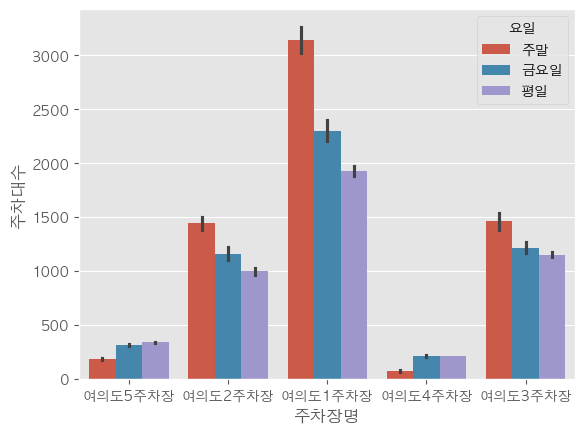

In [48]:
sns.barplot(
    x=yeoeui_merged['주차장명'],
    y=yeoeui_merged['주차대수'],
    hue=yeoeui_merged['요일']
)
plt.show()

> 여의도한강공원의 5개 주차장은 크게 두 유형으로 나뉘는 것 처럼 보인다.     
1. 상업지구형(주말에 수요가 증가함): 1-3주차장
2. 업무지구형(주말에 수요가 감소함): 4,5주차장 -> 4,5주차장의 위치는 한강과 거리가 멀다.


In [49]:
month=pd.read_csv('../ws/data/서울시 한강공원 월별 이용객 현황.csv', encoding='euc-kr')
month=month[['현황 일시','공원 코드','공원명','일반이용자(아침)','일반이용자(낮)','일반이용자(저녁)']]
month.head()

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
0,2024-02-29 00:00:00.0,Hzone001,광나루한강공원,2840.0,33780,25450
1,2024-02-29 00:00:00.0,Hzone006,이촌한강공원,5145.0,47990,37857
2,2024-02-29 00:00:00.0,Hzone003,뚝섬한강공원,13100.0,167450,187420
3,2024-02-29 00:00:00.0,Hzone002,잠실한강공원,9820.0,41340,49010
4,2024-02-29 00:00:00.0,Hzone008,양화한강공원,11150.0,33940,32050


In [50]:
yeoeui_month=month[month['공원명']=='여의도한강공원']
yeoeui_month.head()

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
9,2024-02-29 00:00:00.0,Hzone007,여의도한강공원,3150.0,23920,29360
15,2024-01-31 00:00:00.0,Hzone007,여의도한강공원,4270.0,35940,43388
33,2023-12-31 00:00:00.0,Hzone007,여의도한강공원,3140.0,28213,42220
42,2023-11-30 00:00:00.0,Hzone007,여의도한강공원,4340.0,51520,72330
49,2023-10-31 00:00:00.0,Hzone007,여의도한강공원,15310.0,109070,1228500


In [51]:
yeoeui_month['date']=pd.to_datetime(yeoeui_month['현황 일시'])

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_3585/3106427578.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeoeui_month['date']=pd.to_datetime(yeoeui_month['현황 일시'])


In [52]:
yeoeui_month.head(12)

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁),date
9,2024-02-29 00:00:00.0,Hzone007,여의도한강공원,3150.0,23920,29360,2024-02-29
15,2024-01-31 00:00:00.0,Hzone007,여의도한강공원,4270.0,35940,43388,2024-01-31
33,2023-12-31 00:00:00.0,Hzone007,여의도한강공원,3140.0,28213,42220,2023-12-31
42,2023-11-30 00:00:00.0,Hzone007,여의도한강공원,4340.0,51520,72330,2023-11-30
49,2023-10-31 00:00:00.0,Hzone007,여의도한강공원,15310.0,109070,1228500,2023-10-31
60,2023-09-30 00:00:00.0,Hzone007,여의도한강공원,9470.0,57520,181170,2023-09-30
76,2023-08-31 00:00:00.0,Hzone007,여의도한강공원,8030.0,27180,99720,2023-08-31
80,2023-07-31 00:00:00.0,Hzone007,여의도한강공원,5530.0,61230,80421,2023-07-31
99,2023-06-30 00:00:00.0,Hzone007,여의도한강공원,15520.0,256820,526320,2023-06-30
101,2023-05-31 00:00:00.0,Hzone007,여의도한강공원,4715.0,294430,379960,2023-05-31


In [53]:
yeoeui_month['month']=yeoeui_month['date'].dt.month

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_3585/3466204395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeoeui_month['month']=yeoeui_month['date'].dt.month


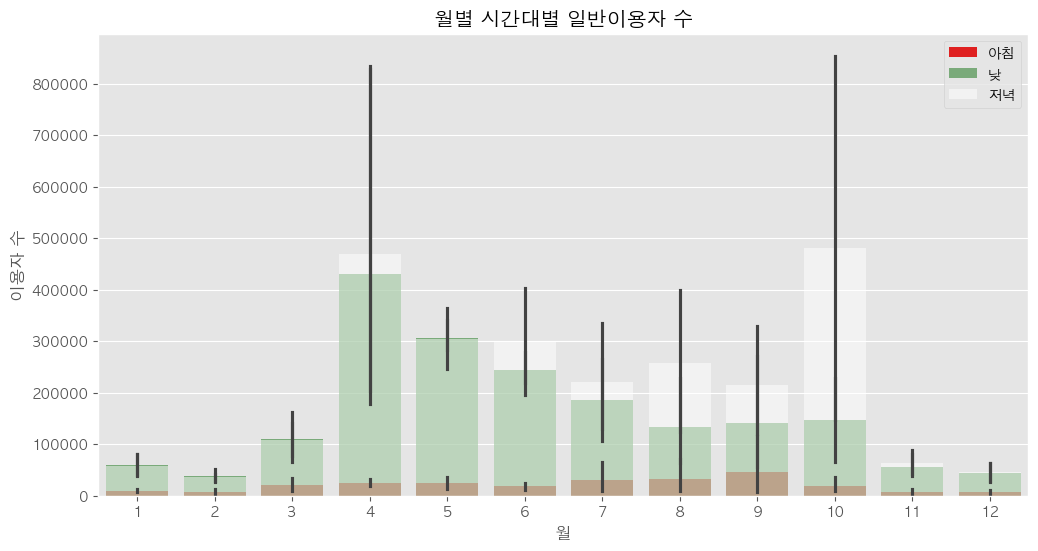

In [54]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='일반이용자(아침)', data=yeoeui_month, color='red', label='아침')
sns.barplot(x='month', y='일반이용자(낮)', data=yeoeui_month, color='green', alpha=0.5, label='낮')
sns.barplot(x='month', y='일반이용자(저녁)', data=yeoeui_month, color='white', alpha=0.5, label='저녁')
plt.title('월별 시간대별 일반이용자 수')
plt.xlabel('월')
plt.ylabel('이용자 수')
plt.show()

In [55]:
yeoeui_month['year']=yeoeui_month['date'].dt.year

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_3585/2719306857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yeoeui_month['year']=yeoeui_month['date'].dt.year


In [56]:
yeoeui_month.head()

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁),date,month,year
9,2024-02-29 00:00:00.0,Hzone007,여의도한강공원,3150.0,23920,29360,2024-02-29,2,2024
15,2024-01-31 00:00:00.0,Hzone007,여의도한강공원,4270.0,35940,43388,2024-01-31,1,2024
33,2023-12-31 00:00:00.0,Hzone007,여의도한강공원,3140.0,28213,42220,2023-12-31,12,2023
42,2023-11-30 00:00:00.0,Hzone007,여의도한강공원,4340.0,51520,72330,2023-11-30,11,2023
49,2023-10-31 00:00:00.0,Hzone007,여의도한강공원,15310.0,109070,1228500,2023-10-31,10,2023


In [57]:
yeoeui_month=yeoeui_month[yeoeui_month['year']>=2020]
yeoeui_month.tail()

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁),date,month,year
506,2020-05-31 00:00:00.0,Hzone007,여의도한강공원,28850.0,285100,200960,2020-05-31,5,2020
511,2020-04-30 00:00:00.0,Hzone007,여의도한강공원,24300.0,168100,131700,2020-04-30,4,2020
521,2020-03-31 00:00:00.0,Hzone007,여의도한강공원,16240.0,111100,55700,2020-03-31,3,2020
530,2020-02-29 00:00:00.0,Hzone007,여의도한강공원,6185.0,28003,25199,2020-02-29,2,2020
543,2020-01-31 00:00:00.0,Hzone007,여의도한강공원,7145.0,37903,31569,2020-01-31,1,2020


In [58]:
yeoeui_merged['month'].unique()

array([11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1, 12], dtype=int32)

In [59]:
yeoeui_month.tail()

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁),date,month,year
506,2020-05-31 00:00:00.0,Hzone007,여의도한강공원,28850.0,285100,200960,2020-05-31,5,2020
511,2020-04-30 00:00:00.0,Hzone007,여의도한강공원,24300.0,168100,131700,2020-04-30,4,2020
521,2020-03-31 00:00:00.0,Hzone007,여의도한강공원,16240.0,111100,55700,2020-03-31,3,2020
530,2020-02-29 00:00:00.0,Hzone007,여의도한강공원,6185.0,28003,25199,2020-02-29,2,2020
543,2020-01-31 00:00:00.0,Hzone007,여의도한강공원,7145.0,37903,31569,2020-01-31,1,2020


In [60]:
print(yeoeui_merged.columns)
print(yeoeui_month.columns)

Index(['지구별_x', '주차장명', '주차대수', '이용시간', '날짜', 'date', 'month', 'year', '요일',
       '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 상대습도(%)', '지구별_y', '주차장별',
       '면수'],
      dtype='object')
Index(['현황 일시', '공원 코드', '공원명', '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)', 'date',
       'month', 'year'],
      dtype='object')


In [61]:
yeoeui_merged.head()

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수
0,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도5주차장,217
1,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도2주차장,171
2,PLT-008,여의도1주차장,3398,355119,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도1주차장,462
3,PLT-008,여의도4주차장,41,1994,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도4주차장,141
4,PLT-008,여의도3주차장,2326,318649,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도3주차장,800


In [62]:
yeoeui_month.head()

,현황 일시,공원 코드,공원명,일반이용자(아침),일반이용자(낮),일반이용자(저녁),date,month,year
9,2024-02-29 00:00:00.0,Hzone007,여의도한강공원,3150.0,23920,29360,2024-02-29,2,2024
15,2024-01-31 00:00:00.0,Hzone007,여의도한강공원,4270.0,35940,43388,2024-01-31,1,2024
33,2023-12-31 00:00:00.0,Hzone007,여의도한강공원,3140.0,28213,42220,2023-12-31,12,2023
42,2023-11-30 00:00:00.0,Hzone007,여의도한강공원,4340.0,51520,72330,2023-11-30,11,2023
49,2023-10-31 00:00:00.0,Hzone007,여의도한강공원,15310.0,109070,1228500,2023-10-31,10,2023


In [63]:
# 날짜를 기준으로 병합
mon_div = pd.merge(yeoeui_merged, yeoeui_month[['year','month','일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)']],
                    how='left', left_on=['year','month'],right_on=['year','month'])
# 병합 결과 확인
mon_div.head()

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
0,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도5주차장,217,NaN,NaN,NaN
1,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도2주차장,171,NaN,NaN,NaN
2,PLT-008,여의도1주차장,3398,355119,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도1주차장,462,NaN,NaN,NaN
3,PLT-008,여의도4주차장,41,1994,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도4주차장,141,NaN,NaN,NaN
4,PLT-008,여의도3주차장,2326,318649,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도3주차장,800,NaN,NaN,NaN


In [64]:
mon_div.head(20)

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
0,PLT-008,여의도5주차장,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도5주차장,217,NaN,NaN,NaN
1,PLT-008,여의도2주차장,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도2주차장,171,NaN,NaN,NaN
2,PLT-008,여의도1주차장,3398,355119,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도1주차장,462,NaN,NaN,NaN
3,PLT-008,여의도4주차장,41,1994,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도4주차장,141,NaN,NaN,NaN
4,PLT-008,여의도3주차장,2326,318649,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,여의도,여의도3주차장,800,NaN,NaN,NaN
5,PLT-008,여의도3주차장,1209,122181,2024/11/09,2024-11-09,11,2024,주말,12.9,6.8,20.3,55.8,여의도,여의도3주차장,800,NaN,NaN,NaN
6,PLT-008,여의도2주차장,1648,113881,2024/11/09,2024-11-09,11,2024,주말,12.9,6.8,20.3,55.8,여의도,여의도2주차장,171,NaN,NaN,NaN
7,PLT-008,여의도5주차장,210,27294,2024/11/09,2024-11-09,11,2024,주말,12.9,6.8,20.3,55.8,여의도,여의도5주차장,217,NaN,NaN,NaN
8,PLT-008,여의도4주차장,48,3550,2024/11/09,2024-11-09,11,2024,주말,12.9,6.8,20.3,55.8,여의도,여의도4주차장,141,NaN,NaN,NaN
9,PLT-008,여의도1주차장,3229,324829,2024/11/09,2024-11-09,11,2024,주말,12.9,6.8,20.3,55.8,여의도,여의도1주차장,462,NaN,NaN,NaN


In [65]:
mon_div.tail()

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
8675,PLT-008,여의도1주차장,1541,172802,2020/01/18,2020-01-18,1,2020,주말,0.3,-4.1,5.9,48.1,여의도,여의도1주차장,462,7145.0,37903.0,31569.0
8676,PLT-008,여의도1주차장,1113,255747,2020/01/17,2020-01-17,1,2020,금요일,-0.6,-4.8,4.9,43.9,여의도,여의도1주차장,462,7145.0,37903.0,31569.0
8677,PLT-008,여의도1주차장,873,221484,2020/01/16,2020-01-16,1,2020,평일,-1.7,-5.5,3.2,43.0,여의도,여의도1주차장,462,7145.0,37903.0,31569.0
8678,PLT-008,여의도1주차장,114,6073,2020/01/15,2020-01-15,1,2020,평일,-2.7,-6.4,2.2,44.8,여의도,여의도1주차장,462,7145.0,37903.0,31569.0
8679,PLT-008,여의도1주차장,2,0,2020/01/14,2020-01-14,1,2020,평일,-2.3,-5.7,2.6,45.3,여의도,여의도1주차장,462,7145.0,37903.0,31569.0


In [66]:
mon_div['주차대수'].corr(mon_div['일반이용자(낮)'])

0.12098969276159537

In [67]:
mon_div['최고기온(°C)'].corr(mon_div['일반이용자(낮)'])

0.49809996078287905

In [68]:
mon_div['최고기온(°C)'].corr(mon_div['주차대수'])

0.1919113887999194

In [69]:
mon_div['최고기온(°C)'].mean()

18.940691244239634

In [70]:
mon_div['주차대수'].max()

7424

In [71]:
mon_div.loc[mon_div['최고기온(°C)']>=35,'주차대수'].max()
mon_div.loc[mon_div['최고기온(°C)']>=35,'주차대수'].mean()

1040.4526315789474

In [72]:
mon_div['주차대수'].mean()-mon_div.loc[mon_div['최고기온(°C)']<=15,'주차대수'].mean()

265.4727648354551

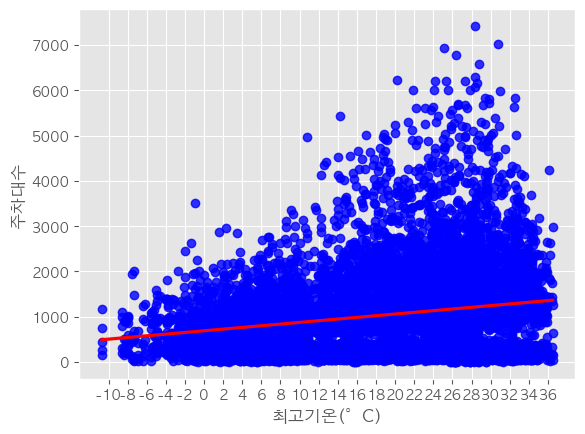

In [73]:
sns.regplot(x='최고기온(°C)', y='주차대수', data=mon_div, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xticks(range(int(mon_div['최고기온(°C)'].min()),
int(mon_div['최고기온(°C)'].max()) + 1, 2))
plt.show()

> 최고기온이 최저일때부터 약 28도일 때까지는 주차대수가 증가하는 경향을 보이다가, 28도가 넘어가면 급격하게 감소한다.

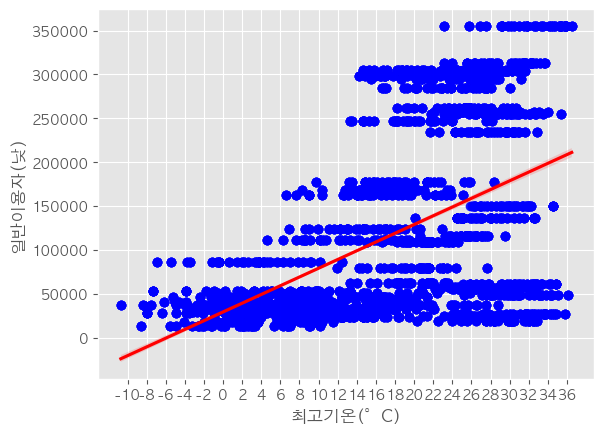

In [74]:
sns.regplot(x='최고기온(°C)', y='일반이용자(낮)', data=mon_div, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xticks(range(int(mon_div['최고기온(°C)'].min()),
int(mon_div['최고기온(°C)'].max()) + 1, 2))
plt.show()

> 일반이용자 수는 주차대수와 달리 기온이 높아질수록 대체로 증가하는 비율을 보인다.

In [75]:
mon_div['일반이용자(낮)'].mean()

118581.48031283711

In [76]:
print(mon_div.loc[(mon_div['최고기온(°C)']>=28)&(mon_div['최고기온(°C)']<=35),'일반이용자(낮)'].mean())

160244.17434443656


In [77]:
print(mon_div.loc[mon_div['최고기온(°C)']>=35,'일반이용자(낮)'].mean())
print(mon_div.loc[(mon_div['최고기온(°C)']>=36),'일반이용자(낮)'].mean())

275158.46153846156
201895.0


> 정확한 원인을 알 수 없지만 일정 수준(약 28도) 이상이면 일반이용자 수가 조금씩 다시 감소하다가 35도 이상일 때 급격하게 증가한다.(이상치?)

In [78]:
mon_div[(mon_div['최고기온(°C)']>=35)&(mon_div['year']==2021)]

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
5934,PLT-008,여의도3주차장,1048,324573,2021/07/30,2021-07-30,7,2021,금요일,30.5,25.8,35.4,63.1,여의도,여의도3주차장,800,25060.0,355300.0,464150.0
5935,PLT-008,여의도4주차장,178,56957,2021/07/30,2021-07-30,7,2021,금요일,30.5,25.8,35.4,63.1,여의도,여의도4주차장,141,25060.0,355300.0,464150.0
5936,PLT-008,여의도5주차장,277,105472,2021/07/30,2021-07-30,7,2021,금요일,30.5,25.8,35.4,63.1,여의도,여의도5주차장,217,25060.0,355300.0,464150.0
5937,PLT-008,여의도1주차장,2369,278684,2021/07/30,2021-07-30,7,2021,금요일,30.5,25.8,35.4,63.1,여의도,여의도1주차장,462,25060.0,355300.0,464150.0
5938,PLT-008,여의도2주차장,1078,166507,2021/07/30,2021-07-30,7,2021,금요일,30.5,25.8,35.4,63.1,여의도,여의도2주차장,171,25060.0,355300.0,464150.0
5949,PLT-008,여의도2주차장,876,163349,2021/07/27,2021-07-27,7,2021,평일,31.1,27.8,35.7,60.5,여의도,여의도2주차장,171,25060.0,355300.0,464150.0
5950,PLT-008,여의도5주차장,291,112171,2021/07/27,2021-07-27,7,2021,평일,31.1,27.8,35.7,60.5,여의도,여의도5주차장,217,25060.0,355300.0,464150.0
5951,PLT-008,여의도4주차장,180,60290,2021/07/27,2021-07-27,7,2021,평일,31.1,27.8,35.7,60.5,여의도,여의도4주차장,141,25060.0,355300.0,464150.0
5952,PLT-008,여의도1주차장,1996,284187,2021/07/27,2021-07-27,7,2021,평일,31.1,27.8,35.7,60.5,여의도,여의도1주차장,462,25060.0,355300.0,464150.0
5953,PLT-008,여의도3주차장,986,361519,2021/07/27,2021-07-27,7,2021,평일,31.1,27.8,35.7,60.5,여의도,여의도3주차장,800,25060.0,355300.0,464150.0


In [79]:
mon_div[(mon_div['최고기온(°C)']>=35)&(mon_div['year']==2023)]

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁)
2289,PLT-008,여의도2주차장,1217,209289,2023/08/08,2023-08-08,8,2023,평일,30.9,26.4,35.8,60.5,여의도,여의도2주차장,171,8030.0,27180.0,99720.0
2290,PLT-008,여의도5주차장,398,103598,2023/08/08,2023-08-08,8,2023,평일,30.9,26.4,35.8,60.5,여의도,여의도5주차장,217,8030.0,27180.0,99720.0
2291,PLT-008,여의도4주차장,236,73489,2023/08/08,2023-08-08,8,2023,평일,30.9,26.4,35.8,60.5,여의도,여의도4주차장,141,8030.0,27180.0,99720.0
2292,PLT-008,여의도1주차장,2084,310764,2023/08/08,2023-08-08,8,2023,평일,30.9,26.4,35.8,60.5,여의도,여의도1주차장,462,8030.0,27180.0,99720.0
2293,PLT-008,여의도3주차장,1459,448709,2023/08/08,2023-08-08,8,2023,평일,30.9,26.4,35.8,60.5,여의도,여의도3주차장,800,8030.0,27180.0,99720.0


> 원인은 알 수 없지만, 주차대수에 비해 코로나 시기(2020-2021)의 일반이용자 수 데이터의 차이가 매우 크다.(실내 사회적 거리두기의 영향?)  
따라서 코로나 시기(2020~2021)년도의 일반이용자 수 데이터는 주차대수 예측에 사용하기 어려워보인다.

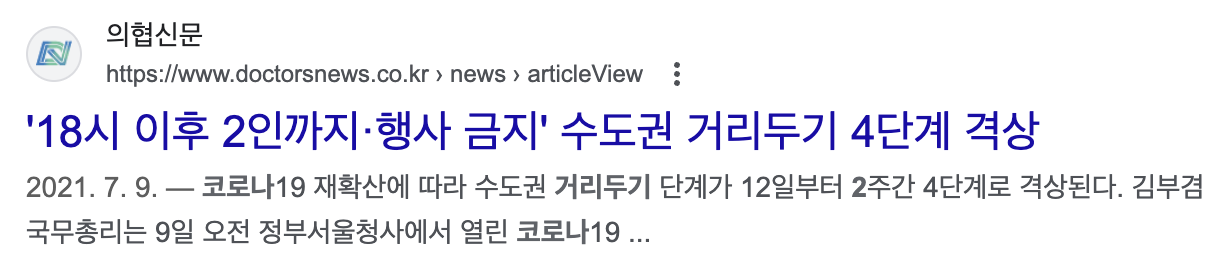

In [80]:
mon_div['주차대수'].corr(mon_div.loc[(mon_div['year']>=2022)&(mon_div['year']<2024),'일반이용자(낮)'])

0.15911483635460852

In [81]:
mon_div['일반이용자(낮)'].min()

12880.0

In [82]:
mon_div.loc[mon_div['최고기온(°C)']<=0,'주차대수'].mean()

653.3020833333334

In [83]:
mon_div.loc[mon_div['최고기온(°C)']>=35,'주차대수'].mean()

1040.4526315789474

In [84]:
mon_div['주차대수'].mean()

1039.9824884792627

In [85]:
mon_div['day']=mon_div['date'].dt.day

In [86]:
def calculate_weighted_user_count(temp, user_count):
    if temp < 0:
        weight = 0.3  # 영하일 때 고정된 가중치
    elif temp < 15:
        weight = max(0.5, temp / 25)   # 기온이 낮을 때 완만하게 증가
    elif temp < 28:
        weight = 1 + (temp - 15) * 0.1
    else:
        weight = 1 + (temp-28) * 0.1
    
    adjusted_count = user_count * weight
    return adjusted_count

def apply_weighted_average(row, df):
    condition = (
        (df['year'] == 2023) &
        (df['month'] == row['month']) &
        (df['요일'] == row['요일'])&
        (df['주차장명'] == row['주차장명'])
    )
    matching_rows = df[condition]
    
    if len(matching_rows) > 0:
        weighted_counts = matching_rows.apply(
            lambda x: calculate_weighted_user_count(x['최고기온(°C)'], x['일반이용자(아침)']),
            axis=1
        )
        return weighted_counts.mean()
    return np.nan

In [87]:
mon_div.loc[(mon_div['year']==2023)&(mon_div['month']==4),'최고기온(°C)'].mean()
mon_div.loc[(mon_div['year']==2023)&(mon_div['month']==4),'최고기온(°C)'].mean()

18.953333333333326

> 결측치는 2024에만 있으므로 일단 apply_weighted_average 함수로 2024의 결측치를 채워준다.

In [88]:
mon_div['일반이용자(아침)'] = np.where(mon_div['일반이용자(아침)'].isnull(), 
                                mon_div.apply(lambda row: apply_weighted_average(row, mon_div),
                                axis=1
                                    ), 
                                    mon_div['일반이용자(아침)'])
# mon_div['일반이용자(아침)'] = mon_div.apply(
#     lambda row: apply_weighted_average(row, mon_div) 
#     if pd.isna(row['일반이용자(아침)']) else row['일반이용자(아침)'],
#     axis=1
# )

In [89]:
def apply_weighted_average(row, df):
    condition = (
        (df['year'] == 2023) &
        (df['month'] == row['month']) &
        (df['요일'] == row['요일'])&
        (df['주차장명'] == row['주차장명'])
    )
    matching_rows = df[condition]
    
    if len(matching_rows) > 0:
        weighted_counts = matching_rows.apply(
            lambda x: calculate_weighted_user_count(x['최고기온(°C)'], x['일반이용자(낮)']),
            axis=1
        )
        return weighted_counts.mean()
    return np.nan

In [90]:
mon_div['일반이용자(낮)'] = np.where(mon_div['일반이용자(낮)'].isnull(), 
                                mon_div.apply(lambda row: apply_weighted_average(row, mon_div),
                                axis=1
                                    ), 
                                    mon_div['일반이용자(낮)'])

In [91]:
def apply_weighted_average(row, df):
    condition = (
        (df['year'] == 2023) &
        (df['month'] == row['month']) &
        (df['요일'] == row['요일'])&
        (df['주차장명'] == row['주차장명'])
    )
    matching_rows = df[condition]
    
    if len(matching_rows) > 0:
        weighted_counts = matching_rows.apply(
            lambda x: calculate_weighted_user_count(x['최고기온(°C)'], x['일반이용자(저녁)']),
            axis=1
        )
        return weighted_counts.mean()
    return np.nan

mon_div['일반이용자(저녁)'] = np.where(mon_div['일반이용자(저녁)'].isnull(), 
                                mon_div.apply(lambda row: apply_weighted_average(row, mon_div),
                                axis=1
                                    ), 
                                    mon_div['일반이용자(저녁)'])

In [92]:
mon_div.tail()

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁),day
8675,PLT-008,여의도1주차장,1541,172802,2020/01/18,2020-01-18,1,2020,주말,0.3,-4.1,5.9,48.1,여의도,여의도1주차장,462,7145.0,37903.0,31569.0,18
8676,PLT-008,여의도1주차장,1113,255747,2020/01/17,2020-01-17,1,2020,금요일,-0.6,-4.8,4.9,43.9,여의도,여의도1주차장,462,7145.0,37903.0,31569.0,17
8677,PLT-008,여의도1주차장,873,221484,2020/01/16,2020-01-16,1,2020,평일,-1.7,-5.5,3.2,43.0,여의도,여의도1주차장,462,7145.0,37903.0,31569.0,16
8678,PLT-008,여의도1주차장,114,6073,2020/01/15,2020-01-15,1,2020,평일,-2.7,-6.4,2.2,44.8,여의도,여의도1주차장,462,7145.0,37903.0,31569.0,15
8679,PLT-008,여의도1주차장,2,0,2020/01/14,2020-01-14,1,2020,평일,-2.3,-5.7,2.6,45.3,여의도,여의도1주차장,462,7145.0,37903.0,31569.0,14


> ~2023의 data들도 그 달의 평균값으로 모두 들어가있으므로 calculate_weighted_user_count로 요일/기온에 따른 이용객 수로 대치해준다.

In [93]:
mon_div.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 20 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   지구별_x       8680 non-null   object        
 1   주차장명        8680 non-null   object        
 2   주차대수        8680 non-null   int64         
 3   이용시간        8680 non-null   int64         
 4   날짜          8680 non-null   object        
 5   date        8680 non-null   datetime64[ns]
 6   month       8680 non-null   int32         
 7   year        8680 non-null   int32         
 8   요일          8680 non-null   object        
 9   평균기온(°C)    8680 non-null   float64       
 10  최저기온(°C)    8675 non-null   float64       
 11  최고기온(°C)    8680 non-null   float64       
 12  평균 상대습도(%)  8680 non-null   float64       
 13  지구별_y       8680 non-null   object        
 14  주차장별        8680 non-null   object        
 15  면수          8680 non-null   int64         
 16  일반이용자(아침)   8680 non-nul

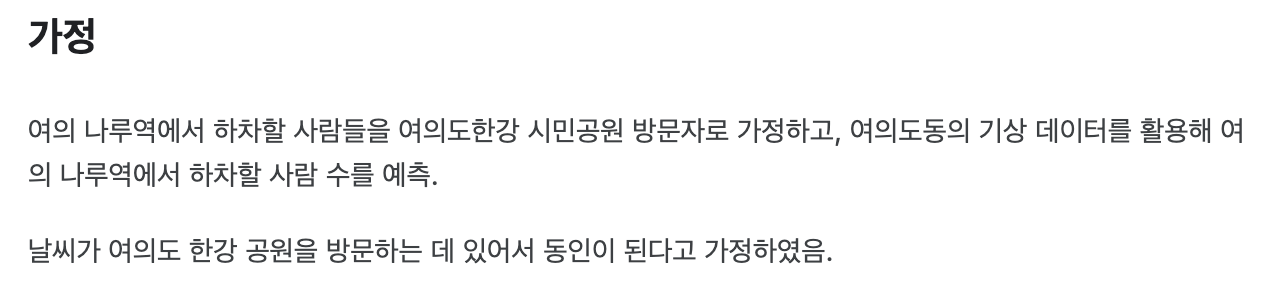      
https://www.kaggle.com/competitions/2022-ai-tp-18010161/overview

In [94]:
subway=pd.read_csv('../ws/data/서울교통공사_역별 일별 시간대별 승하차인원(24.2~24.5).csv',encoding='euc-kr')
subway.head()

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
0,1,2024-02-01,1호선,150,서울역,승차,316,511,1695,2766,...,3255,3667,6765,9441,4326,2925,2838,1848,849,117
1,2,2024-02-01,1호선,150,서울역,하차,252,1963,4684,10427,...,2396,2684,3040,3220,1861,1379,1176,886,354,129
2,3,2024-02-01,1호선,151,시청,승차,83,152,287,293,...,1766,1988,3839,7287,2672,2329,2353,1296,483,41
3,4,2024-02-01,1호선,151,시청,하차,189,902,3362,8938,...,906,815,920,1128,481,303,301,200,107,38
4,5,2024-02-01,1호선,152,종각,승차,127,148,231,359,...,2375,2747,6164,10258,4233,3736,3914,2937,1194,76


In [95]:
sub_yeo=subway[subway['역명']=='여의나루']
sub_yeo.head()

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,15시-16시,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후
272,273,2024-02-01,5호선,2528,여의나루,승차,46,86,275,434,...,570,847,2166,2765,985,915,573,339,113,9
273,274,2024-02-01,5호선,2528,여의나루,하차,50,506,1869,3455,...,523,455,631,714,392,228,193,140,80,44
816,817,2024-02-02,5호선,2528,여의나루,승차,41,93,261,379,...,586,1068,2225,2695,917,863,611,376,119,23
817,818,2024-02-02,5호선,2528,여의나루,하차,38,498,1712,3264,...,572,516,670,832,484,275,180,160,71,48
1360,1361,2024-02-03,5호선,2528,여의나루,승차,33,47,75,105,...,709,861,847,732,767,1021,532,245,100,2


In [96]:
sub_yeo['date']=pd.to_datetime(sub_yeo['날짜'])
sub_yeo.head()

/var/folders/r4/77bfg6f94ylc4fbsrpn6kvc40000gn/T/ipykernel_3585/2411399847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_yeo['date']=pd.to_datetime(sub_yeo['날짜'])


,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후,date
272,273,2024-02-01,5호선,2528,여의나루,승차,46,86,275,434,...,847,2166,2765,985,915,573,339,113,9,2024-02-01
273,274,2024-02-01,5호선,2528,여의나루,하차,50,506,1869,3455,...,455,631,714,392,228,193,140,80,44,2024-02-01
816,817,2024-02-02,5호선,2528,여의나루,승차,41,93,261,379,...,1068,2225,2695,917,863,611,376,119,23,2024-02-02
817,818,2024-02-02,5호선,2528,여의나루,하차,38,498,1712,3264,...,516,670,832,484,275,180,160,71,48,2024-02-02
1360,1361,2024-02-03,5호선,2528,여의나루,승차,33,47,75,105,...,861,847,732,767,1021,532,245,100,2,2024-02-03


In [97]:
sub_yeo=sub_yeo[sub_yeo['구분']=='하차']
sub_yeo.head()

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,16시-17시,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후,date
273,274,2024-02-01,5호선,2528,여의나루,하차,50,506,1869,3455,...,455,631,714,392,228,193,140,80,44,2024-02-01
817,818,2024-02-02,5호선,2528,여의나루,하차,38,498,1712,3264,...,516,670,832,484,275,180,160,71,48,2024-02-02
1361,1362,2024-02-03,5호선,2528,여의나루,하차,33,315,245,328,...,926,792,539,313,214,170,121,74,7,2024-02-03
1905,1906,2024-02-04,5호선,2528,여의나루,하차,42,281,207,375,...,912,753,522,386,233,180,88,56,12,2024-02-04
2449,2450,2024-02-05,5호선,2528,여의나루,하차,57,520,1728,3540,...,429,436,559,309,180,136,119,65,27,2024-02-05


In [98]:
# park['요일']=park['date'].dt.weekday.map(dict(enumerate(days)))
sub_yeo['요일']=sub_yeo['date'].dt.weekday.map(dict(enumerate(days)))
sub_yeo.head()

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,17시-18시,18시-19시,19시-20시,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후,date,요일
273,274,2024-02-01,5호선,2528,여의나루,하차,50,506,1869,3455,...,631,714,392,228,193,140,80,44,2024-02-01,평일
817,818,2024-02-02,5호선,2528,여의나루,하차,38,498,1712,3264,...,670,832,484,275,180,160,71,48,2024-02-02,금요일
1361,1362,2024-02-03,5호선,2528,여의나루,하차,33,315,245,328,...,792,539,313,214,170,121,74,7,2024-02-03,주말
1905,1906,2024-02-04,5호선,2528,여의나루,하차,42,281,207,375,...,753,522,386,233,180,88,56,12,2024-02-04,주말
2449,2450,2024-02-05,5호선,2528,여의나루,하차,57,520,1728,3540,...,436,559,309,180,136,119,65,27,2024-02-05,평일


In [99]:
sub_yeo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 273 to 65553
Data columns (total 28 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   연번       121 non-null    int64         
 1   날짜       121 non-null    object        
 2   호선       121 non-null    object        
 3   역번호      121 non-null    int64         
 4   역명       121 non-null    object        
 5   구분       121 non-null    object        
 6   06시 이전   121 non-null    int64         
 7   06시-07시  121 non-null    int64         
 8   07시-08시  121 non-null    int64         
 9   08시-09시  121 non-null    int64         
 10  09시-10시  121 non-null    int64         
 11  10시-11시  121 non-null    int64         
 12  11시-12시  121 non-null    int64         
 13  12시-13시  121 non-null    int64         
 14  13시-14시  121 non-null    int64         
 15  14시-15시  121 non-null    int64         
 16  15시-16시  121 non-null    int64         
 17  16시-17시  121 non-null    int64      

In [100]:
sub_yeo['아침']=sub_yeo.iloc[:,6:10].sum(axis=1)    # 6-9시. 3시간
sub_yeo['낮']=sub_yeo.iloc[:,10:18].sum(axis=1)     # 9-17시. 8시간
sub_yeo['저녁']=sub_yeo.iloc[:,18:23].sum(axis=1)    # 17-22시. 5시간 
sub_yeo.head()

,연번,날짜,호선,역번호,역명,구분,06시 이전,06시-07시,07시-08시,08시-09시,...,20시-21시,21시-22시,22시-23시,23시-24시,24시 이후,date,요일,아침,낮,저녁
273,274,2024-02-01,5호선,2528,여의나루,하차,50,506,1869,3455,...,228,193,140,80,44,2024-02-01,평일,5880,5056,2158
817,818,2024-02-02,5호선,2528,여의나루,하차,38,498,1712,3264,...,275,180,160,71,48,2024-02-02,금요일,5512,5071,2441
1361,1362,2024-02-03,5호선,2528,여의나루,하차,33,315,245,328,...,214,170,121,74,7,2024-02-03,주말,921,6354,2028
1905,1906,2024-02-04,5호선,2528,여의나루,하차,42,281,207,375,...,233,180,88,56,12,2024-02-04,주말,905,6588,2074
2449,2450,2024-02-05,5호선,2528,여의나루,하차,57,520,1728,3540,...,180,136,119,65,27,2024-02-05,평일,5845,4439,1620


In [101]:
sub_yeo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121 entries, 273 to 65553
Data columns (total 31 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   연번       121 non-null    int64         
 1   날짜       121 non-null    object        
 2   호선       121 non-null    object        
 3   역번호      121 non-null    int64         
 4   역명       121 non-null    object        
 5   구분       121 non-null    object        
 6   06시 이전   121 non-null    int64         
 7   06시-07시  121 non-null    int64         
 8   07시-08시  121 non-null    int64         
 9   08시-09시  121 non-null    int64         
 10  09시-10시  121 non-null    int64         
 11  10시-11시  121 non-null    int64         
 12  11시-12시  121 non-null    int64         
 13  12시-13시  121 non-null    int64         
 14  13시-14시  121 non-null    int64         
 15  14시-15시  121 non-null    int64         
 16  15시-16시  121 non-null    int64         
 17  16시-17시  121 non-null    int64      

In [102]:
(sub_yeo.loc[sub_yeo['요일']=='평일','아침']/sub_yeo.loc[sub_yeo['요일']=='평일', ['아침','낮','저녁']].sum()).mean()

nan

In [103]:
print('아침',(sub_yeo.loc[sub_yeo['요일']=='평일','아침']/sub_yeo.loc[sub_yeo['요일']=='평일', ['아침','낮','저녁']].sum(axis=1)).mean())
print('낮',(sub_yeo.loc[sub_yeo['요일']=='평일','낮']/sub_yeo.loc[sub_yeo['요일']=='평일', ['아침','낮','저녁']].sum(axis=1)).mean())
print('저녁',(sub_yeo.loc[sub_yeo['요일']=='평일','저녁']/sub_yeo.loc[sub_yeo['요일']=='평일', ['아침','낮','저녁']].sum(axis=1)).mean())

아침 0.3647739906464466
낮 0.4137743112650002
저녁 0.2214516980885532


In [104]:
print('아침',(sub_yeo.loc[sub_yeo['요일']=='금요일','아침']/sub_yeo.loc[sub_yeo['요일']=='금요일', ['아침','낮','저녁']].sum(axis=1)).mean())
print('낮',(sub_yeo.loc[sub_yeo['요일']=='금요일','낮']/sub_yeo.loc[sub_yeo['요일']=='금요일', ['아침','낮','저녁']].sum(axis=1)).mean())
print('저녁',(sub_yeo.loc[sub_yeo['요일']=='금요일','저녁']/sub_yeo.loc[sub_yeo['요일']=='금요일', ['아침','낮','저녁']].sum(axis=1)).mean())

아침 0.27827925855118263
낮 0.451619250189457
저녁 0.2701014912593604


In [105]:
print('아침',(sub_yeo.loc[sub_yeo['요일']=='주말','아침']/sub_yeo.loc[sub_yeo['요일']=='주말', ['아침','낮','저녁']].sum(axis=1)).mean())
print('낮',(sub_yeo.loc[sub_yeo['요일']=='주말','낮']/sub_yeo.loc[sub_yeo['요일']=='주말', ['아침','낮','저녁']].sum(axis=1)).mean())
print('저녁',(sub_yeo.loc[sub_yeo['요일']=='주말','저녁']/sub_yeo.loc[sub_yeo['요일']=='주말', ['아침','낮','저녁']].sum(axis=1)).mean())

아침 0.07808638960694803
낮 0.6710374456915915
저녁 0.25087616470146046


> 일일 주차대수를 아침/점심/저녁 주차대수로 쪼개기 위해 평일/금요일/주말의 여의나루 아침/낮/저녁 승하차 비율을 계산했다.

In [106]:
mon_div['주차장명'].unique()

array(['여의도5주차장', '여의도2주차장', '여의도1주차장', '여의도4주차장', '여의도3주차장'],
      dtype=object)

In [107]:
mon_div['주차장명']=mon_div['주차장명'].map({'여의도1주차장':1, '여의도2주차장':2, '여의도3주차장':3, '여의도4주차장':4, '여의도5주차장':5})

In [108]:
def div_park(row, when):
    total_park = row['주차대수']
    weekday = row['요일']
    loc = row['주차장명']
    
    if loc <= 3:
        if weekday == '평일':
            if when == '아침':
                weight = 0.36
            elif when == '낮':
                weight = 0.41
            else:
                weight = 0.22
        elif weekday == '금요일':
            if when == '아침':
                weight = 0.28
            elif when == '낮':
                weight = 0.45
            else:
                weight = 0.27
        else:  # 주말
            if when == '아침':
                weight = 0.07
            elif when == '낮':
                weight = 0.67
            else:
                weight = 0.25
    else:
        if weekday == '주말':
            weight = 0.33
        else:
            if when == '아침':
                weight = 0.67
            elif when == '낮':
                weight = 0.25
            else:
                weight = 0.07
    
    return total_park * weight

> 상업지구와 업무지구의 weight 값을 여의나루 역의 시간대별 하차인원 비율로 설정했다.

In [109]:
mon_div.columns

Index(['지구별_x', '주차장명', '주차대수', '이용시간', '날짜', 'date', 'month', 'year', '요일',
       '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 상대습도(%)', '지구별_y', '주차장별', '면수',
       '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)', 'day'],
      dtype='object')

In [110]:
mon_div['주차대수(아침)'] = mon_div.apply(lambda row: div_park(row, when='아침'), axis=1)
mon_div.head()

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),...,최고기온(°C),평균 상대습도(%),지구별_y,주차장별,면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁),day,주차대수(아침)
0,PLT-008,5,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,...,21.0,64.0,여의도,여의도5주차장,217,3345.055,39709.04,55748.3475,10,75.57
1,PLT-008,2,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,...,21.0,64.0,여의도,여의도2주차장,171,3345.055,39709.04,55748.3475,10,135.38
2,PLT-008,1,3398,355119,2024/11/10,2024-11-10,11,2024,주말,14.4,...,21.0,64.0,여의도,여의도1주차장,462,3345.055,39709.04,55748.3475,10,237.86
3,PLT-008,4,41,1994,2024/11/10,2024-11-10,11,2024,주말,14.4,...,21.0,64.0,여의도,여의도4주차장,141,3345.055,39709.04,55748.3475,10,13.53
4,PLT-008,3,2326,318649,2024/11/10,2024-11-10,11,2024,주말,14.4,...,21.0,64.0,여의도,여의도3주차장,800,3345.055,39709.04,55748.3475,10,162.82


In [111]:
mon_div['주차대수(낮)'] = mon_div.apply(lambda row: div_park(row, when='낮'), axis=1)
mon_div['주차대수(저녁)'] = mon_div.apply(lambda row: div_park(row, when='저녁'), axis=1)
mon_div.head()

,지구별_x,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),...,지구별_y,주차장별,면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁),day,주차대수(아침),주차대수(낮),주차대수(저녁)
0,PLT-008,5,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,...,여의도,여의도5주차장,217,3345.055,39709.04,55748.3475,10,75.57,75.57,75.57
1,PLT-008,2,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,...,여의도,여의도2주차장,171,3345.055,39709.04,55748.3475,10,135.38,1295.78,483.50
2,PLT-008,1,3398,355119,2024/11/10,2024-11-10,11,2024,주말,14.4,...,여의도,여의도1주차장,462,3345.055,39709.04,55748.3475,10,237.86,2276.66,849.50
3,PLT-008,4,41,1994,2024/11/10,2024-11-10,11,2024,주말,14.4,...,여의도,여의도4주차장,141,3345.055,39709.04,55748.3475,10,13.53,13.53,13.53
4,PLT-008,3,2326,318649,2024/11/10,2024-11-10,11,2024,주말,14.4,...,여의도,여의도3주차장,800,3345.055,39709.04,55748.3475,10,162.82,1558.42,581.50


In [112]:
mon_div.columns

Index(['지구별_x', '주차장명', '주차대수', '이용시간', '날짜', 'date', 'month', 'year', '요일',
       '평균기온(°C)', '최저기온(°C)', '최고기온(°C)', '평균 상대습도(%)', '지구별_y', '주차장별', '면수',
       '일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)', 'day', '주차대수(아침)', '주차대수(낮)',
       '주차대수(저녁)'],
      dtype='object')

In [113]:
mon_div.drop(
    ['지구별_x','지구별_y', '주차장별'],
    axis=1,
    inplace=True
)
mon_div.head()

,주차장명,주차대수,이용시간,날짜,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁),day,주차대수(아침),주차대수(낮),주차대수(저녁)
0,5,229,22509,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,217,3345.055,39709.04,55748.3475,10,75.57,75.57,75.57
1,2,1934,150135,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,171,3345.055,39709.04,55748.3475,10,135.38,1295.78,483.50
2,1,3398,355119,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,462,3345.055,39709.04,55748.3475,10,237.86,2276.66,849.50
3,4,41,1994,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,141,3345.055,39709.04,55748.3475,10,13.53,13.53,13.53
4,3,2326,318649,2024/11/10,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,800,3345.055,39709.04,55748.3475,10,162.82,1558.42,581.50


In [114]:
mon_div.drop(
    ['날짜'],
    axis=1,
    inplace=True
)
mon_div.head()

,주차장명,주차대수,이용시간,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,일반이용자(아침),일반이용자(낮),일반이용자(저녁),day,주차대수(아침),주차대수(낮),주차대수(저녁)
0,5,229,22509,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,217,3345.055,39709.04,55748.3475,10,75.57,75.57,75.57
1,2,1934,150135,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,171,3345.055,39709.04,55748.3475,10,135.38,1295.78,483.50
2,1,3398,355119,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,462,3345.055,39709.04,55748.3475,10,237.86,2276.66,849.50
3,4,41,1994,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,141,3345.055,39709.04,55748.3475,10,13.53,13.53,13.53
4,3,2326,318649,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,800,3345.055,39709.04,55748.3475,10,162.82,1558.42,581.50


In [115]:
1295/171
# 2276/462

7.573099415204679

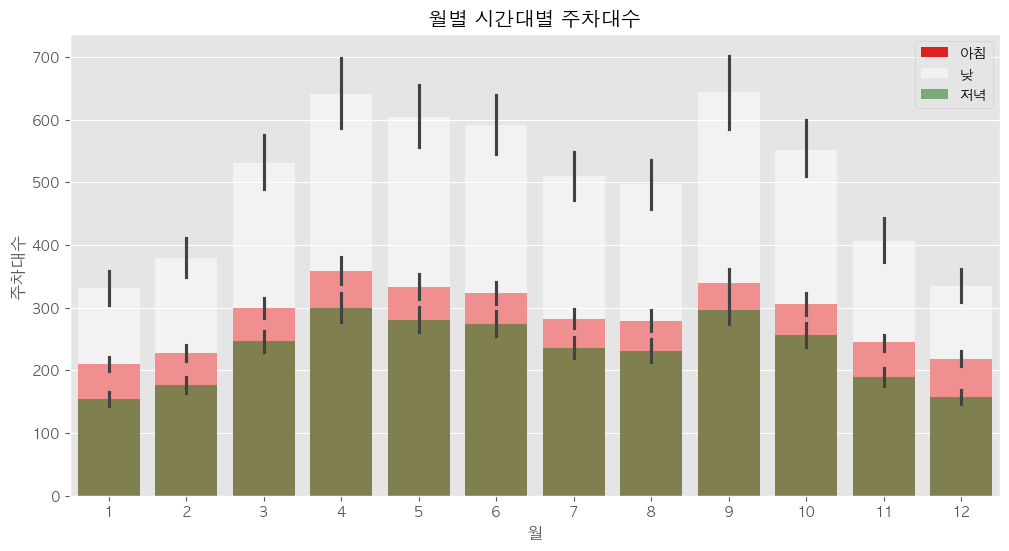

In [116]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='주차대수(아침)', data=mon_div, color='red', label='아침')
sns.barplot(x='month', y='주차대수(낮)', data=mon_div, color='white', alpha=0.5, label='낮')
sns.barplot(x='month', y='주차대수(저녁)', data=mon_div, color='green', alpha=0.5, label='저녁')
plt.title('월별 시간대별 주차대수')
plt.xlabel('월')
plt.ylabel('주차대수')
plt.show()

> 공원 주차장 특성상 기본 parameter는 median이나 mode값이 가장 적절하다고 판단했으나, median과 mode는 현재의 data로는 구할 수가 없다.

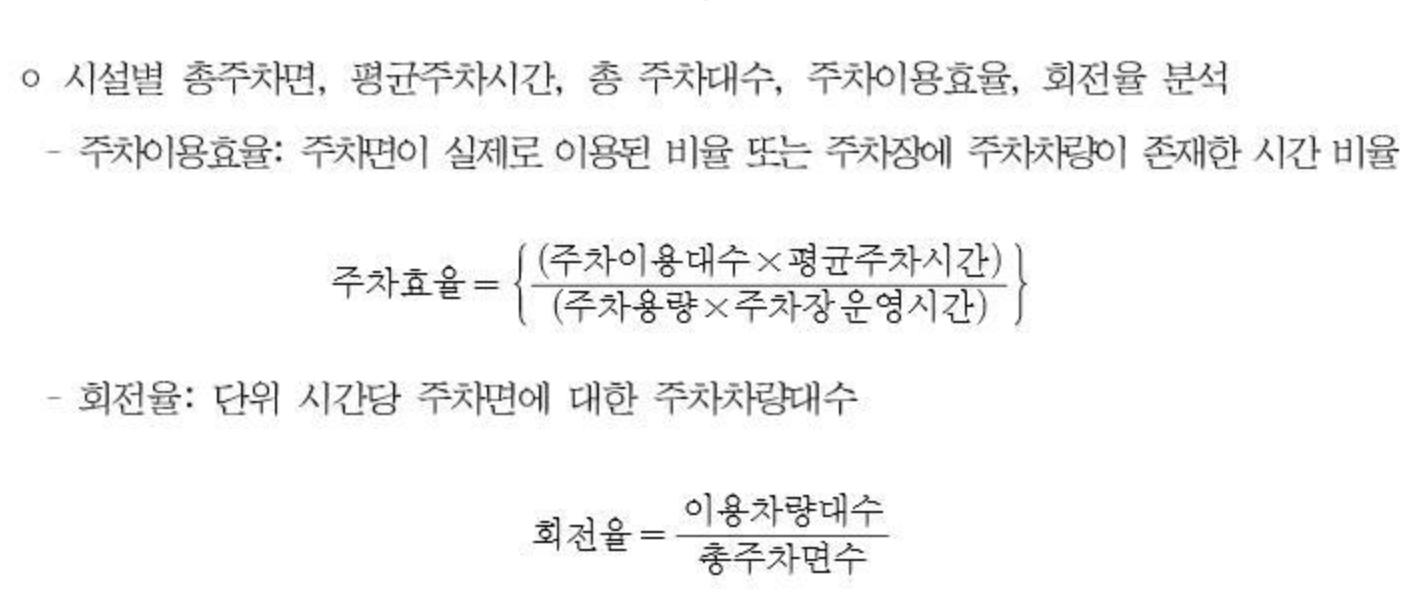
> https://transpro.tistory.com/entry/%EC%A3%BC%EC%B0%A8%ED%9A%A8%EC%9C%A8-%EC%A3%BC%EC%B0%A8%ED%9A%8C%EC%A0%84%EC%9C%A8

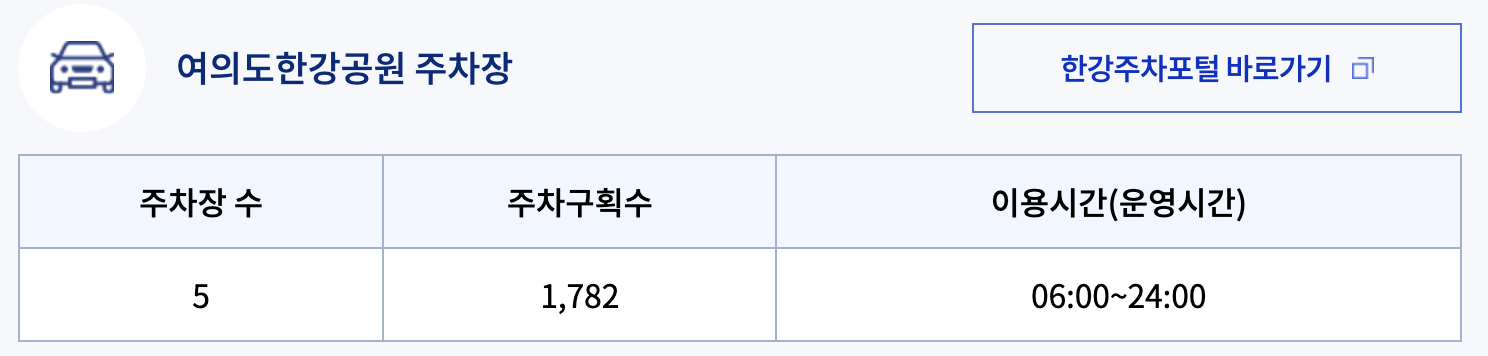
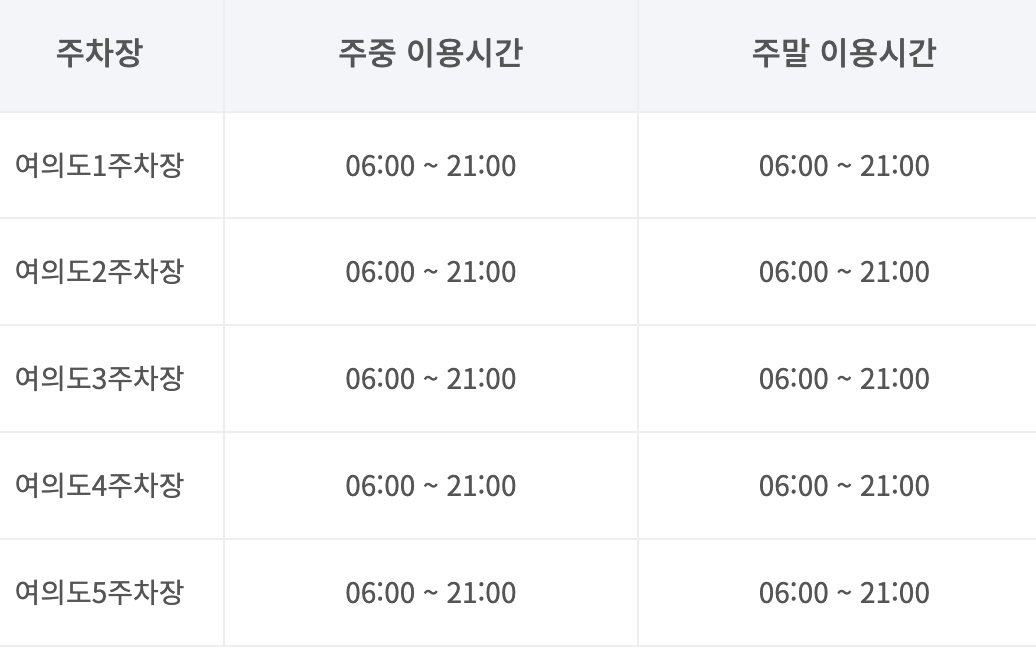

In [117]:
print(mon_div['주차대수(아침)'].max())
print(mon_div['주차대수(낮)'].max())
print(mon_div['주차대수(저녁)'].max())
print(mon_div['주차대수(아침)'].mean())
print(mon_div['주차대수(낮)'].mean())
print(mon_div['주차대수(저녁)'].mean())

2270.16
4974.08
1896.7500000000002
287.38846313364047
507.7835299539171
235.7563698156682


In [118]:
# mon_div.to_csv('../ws/data/1114_hanriver.csv', index=False)

In [119]:
mon_div.drop(
    ['일반이용자(아침)', '일반이용자(낮)', '일반이용자(저녁)'],
    axis=1,
    inplace=True
)
mon_div.head()

,주차장명,주차대수,이용시간,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,day,주차대수(아침),주차대수(낮),주차대수(저녁)
0,5,229,22509,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,217,10,75.57,75.57,75.57
1,2,1934,150135,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,171,10,135.38,1295.78,483.50
2,1,3398,355119,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,462,10,237.86,2276.66,849.50
3,4,41,1994,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,141,10,13.53,13.53,13.53
4,3,2326,318649,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,800,10,162.82,1558.42,581.50


> 구해놓은 아침/낮/저녁 기준의 주차대수가 있으므로 혼잡도의 판단을 주차 회전율 기준으로 정했다.     
주차대수와 마찬가지로 법적 기준의 아침(6-9)/낮(9-17)/저녁(17-10)을 기준으로 회전율을 구해야 하는데, 시간 간격이 모두 다르므로 시간 간격을 반영하여 모두 다르게 나눠준다.    
차량별 이용시간은 모두 동일하다는 가정을 하고 회전율을 구해준다.

In [120]:
1994/(60*41)
318649/(60*2326)

2.2832401834336484

In [121]:
mon_div['회전율(아침)']=mon_div['주차대수(아침)']/(mon_div['면수']*3)
mon_div.head()

,주차장명,주차대수,이용시간,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,day,주차대수(아침),주차대수(낮),주차대수(저녁),회전율(아침)
0,5,229,22509,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,217,10,75.57,75.57,75.57,0.116083
1,2,1934,150135,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,171,10,135.38,1295.78,483.50,0.263899
2,1,3398,355119,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,462,10,237.86,2276.66,849.50,0.171616
3,4,41,1994,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,141,10,13.53,13.53,13.53,0.031986
4,3,2326,318649,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,800,10,162.82,1558.42,581.50,0.067842


In [122]:
mon_div['회전율(낮)']=mon_div['주차대수(낮)']/(mon_div['면수']*8)
mon_div.head()

,주차장명,주차대수,이용시간,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,day,주차대수(아침),주차대수(낮),주차대수(저녁),회전율(아침),회전율(낮)
0,5,229,22509,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,217,10,75.57,75.57,75.57,0.116083,0.043531
1,2,1934,150135,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,171,10,135.38,1295.78,483.50,0.263899,0.947208
2,1,3398,355119,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,462,10,237.86,2276.66,849.50,0.171616,0.615979
3,4,41,1994,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,141,10,13.53,13.53,13.53,0.031986,0.011995
4,3,2326,318649,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,800,10,162.82,1558.42,581.50,0.067842,0.243503


In [123]:
mon_div['회전율(저녁)']=mon_div['주차대수(저녁)']/(mon_div['면수']*5)
mon_div.head()

,주차장명,주차대수,이용시간,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,day,주차대수(아침),주차대수(낮),주차대수(저녁),회전율(아침),회전율(낮),회전율(저녁)
0,5,229,22509,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,217,10,75.57,75.57,75.57,0.116083,0.043531,0.069650
1,2,1934,150135,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,171,10,135.38,1295.78,483.50,0.263899,0.947208,0.565497
2,1,3398,355119,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,462,10,237.86,2276.66,849.50,0.171616,0.615979,0.367749
3,4,41,1994,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,141,10,13.53,13.53,13.53,0.031986,0.011995,0.019191
4,3,2326,318649,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,800,10,162.82,1558.42,581.50,0.067842,0.243503,0.145375


<Axes: xlabel='최고기온(°C)', ylabel='주차대수'>

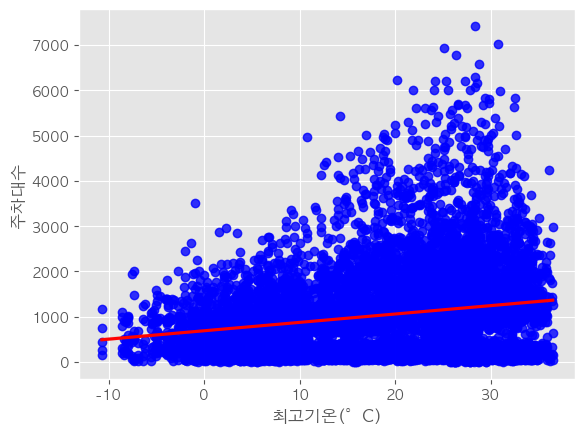

In [124]:
sns.regplot(
    x='최고기온(°C)', y='주차대수', data=mon_div, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})

In [125]:
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(낮)'].min())
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(낮)'].max())
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(낮)'].mode())

0.0019590643274853803
1.8586622807017545
0    0.358999
Name: 회전율(낮), dtype: float64


In [126]:
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(저녁)'].min())
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(저녁)'].max())
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(저녁)'].mode())

0.0011695906432748538
1.1096491228070176
0    0.214327
Name: 회전율(저녁), dtype: float64


In [127]:
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(아침)'].min())
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(아침)'].max())
print(mon_div.loc[(mon_div['요일']=='주말')&(mon_div['주차장명']==2),'회전율(아침)'].mode())

0.0005458089668615985
0.5178362573099415
0    0.100019
Name: 회전율(아침), dtype: float64


In [128]:
# 한글 폰트 문제 해결 
# matplotlib은 한글 폰트를 지원하지 않음
# os정보
import matplotlib.pyplot as plt
import platform

# font_manager : 폰트 관리 모듈
# rc : 폰트 변경 모듈
from matplotlib import font_manager, rc
# unicode 설정
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') # os가 macos
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf' # os가 windows
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

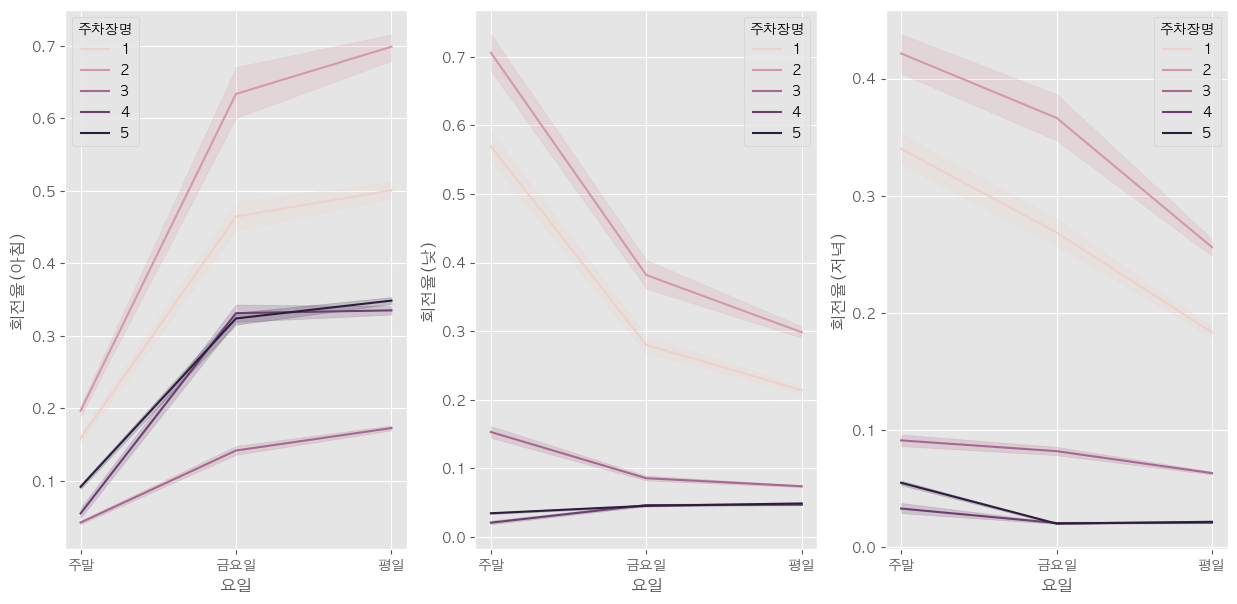

In [129]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.lineplot(
    x='요일',
    y='회전율(아침)',
    hue='주차장명',
    data=mon_div,
    ax=ax1
)
sns.lineplot(
    x='요일',
    y='회전율(낮)',
    hue='주차장명',
    data=mon_div,
    ax=ax2
)
sns.lineplot(
    x='요일',
    y='회전율(저녁)',
    hue='주차장명',
    data=mon_div,
    ax=ax3
)
plt.show()

> 아침에 입차하여 낮 이후에 출차하거나, 낮에 입차하여 저녁에 출차하는 경우가 많을텐데, 회전율을 구할 때 맞는 아침/낮/저녁의 1시간의 가중치를 모두 동일하게 주어서인지 낮의 혼잡도가 너무 낮게 나와서 실제 결과와는 조금 동떨어진다는 생각이 들었다. 낮시간대의 가중치를 조금 더 줘서 회전율을 다시 계산하기로 했다.   

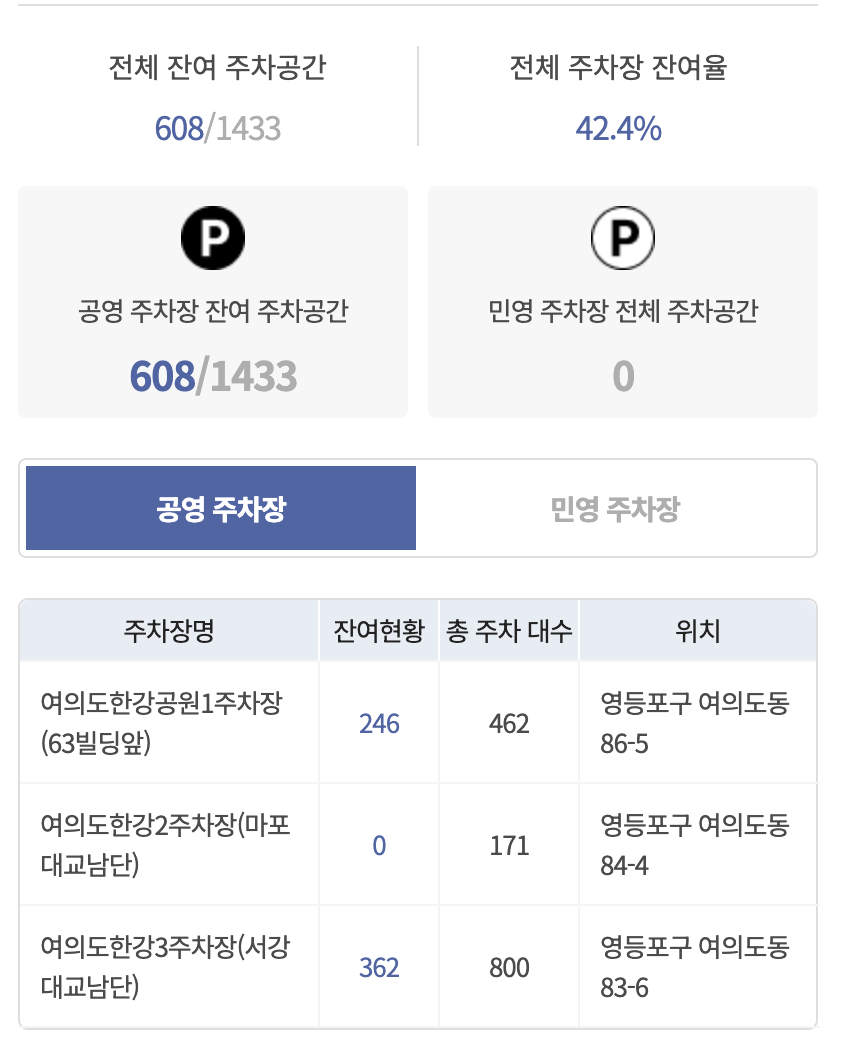

In [130]:
mon_div['회전율(낮)']=mon_div['주차대수(낮)']/(mon_div['면수']*8*0.7)
mon_div.head()

,주차장명,주차대수,이용시간,date,month,year,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,day,주차대수(아침),주차대수(낮),주차대수(저녁),회전율(아침),회전율(낮),회전율(저녁)
0,5,229,22509,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,217,10,75.57,75.57,75.57,0.116083,0.062187,0.069650
1,2,1934,150135,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,171,10,135.38,1295.78,483.50,0.263899,1.353154,0.565497
2,1,3398,355119,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,462,10,237.86,2276.66,849.50,0.171616,0.879971,0.367749
3,4,41,1994,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,141,10,13.53,13.53,13.53,0.031986,0.017135,0.019191
4,3,2326,318649,2024-11-10,11,2024,주말,14.4,10.3,21.0,64.0,800,10,162.82,1558.42,581.50,0.067842,0.347862,0.145375


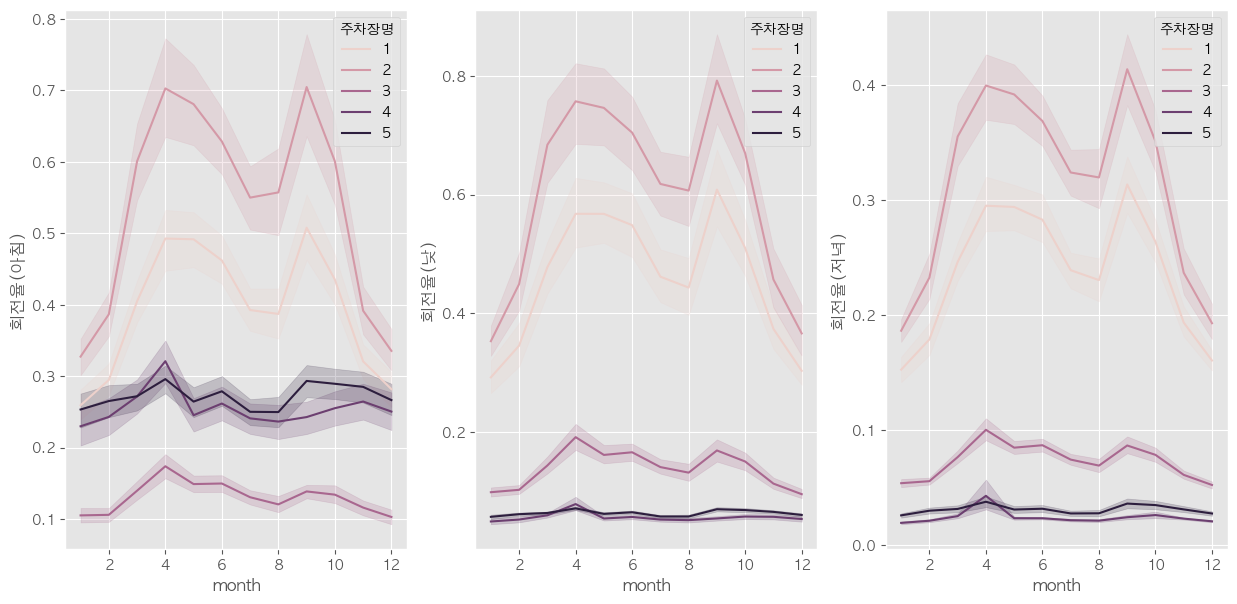

In [131]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.lineplot(
    x='month',
    y='회전율(아침)',
    hue='주차장명',
    data=mon_div,
    ax=ax1
)
sns.lineplot(
    x='month',
    y='회전율(낮)',
    hue='주차장명',
    data=mon_div,
    ax=ax2
)
sns.lineplot(
    x='month',
    y='회전율(저녁)',
    hue='주차장명',
    data=mon_div,
    ax=ax3
)
plt.show()

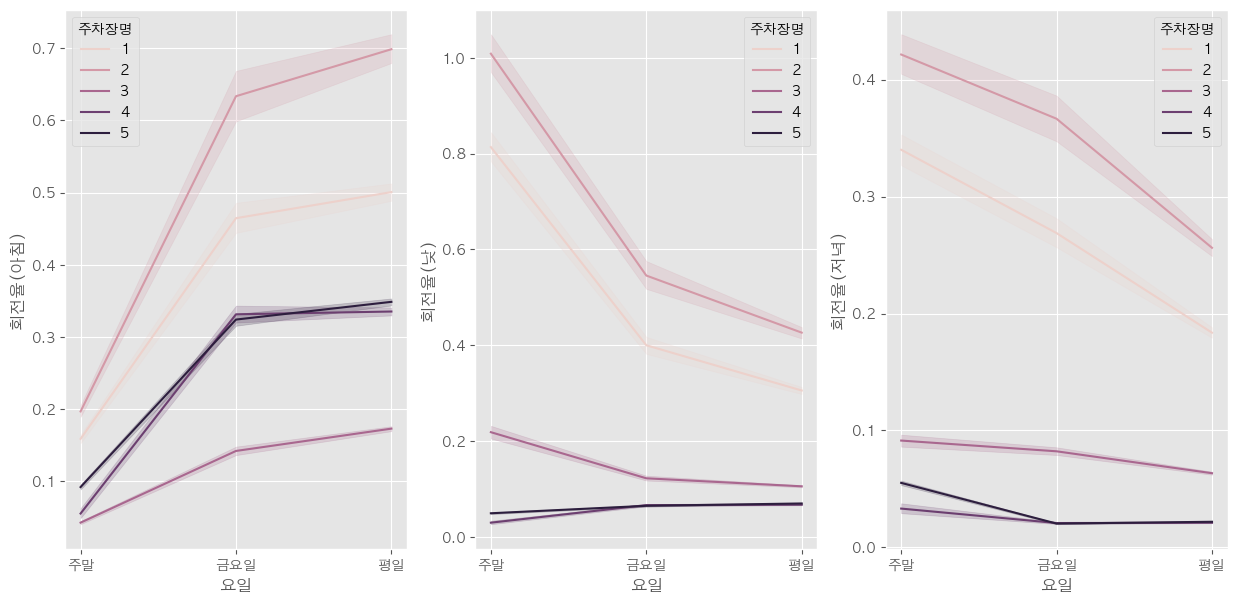

In [132]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.lineplot(
    x='요일',
    y='회전율(아침)',
    hue='주차장명',
    data=mon_div,
    ax=ax1
)
sns.lineplot(
    x='요일',
    y='회전율(낮)',
    hue='주차장명',
    data=mon_div,
    ax=ax2
)
sns.lineplot(
    x='요일',
    y='회전율(저녁)',
    hue='주차장명',
    data=mon_div,
    ax=ax3
)
plt.show()

### 회전율 혼잡 기준
> 회전율 < 0.2: 여유    
> 회전율 < 0.4: 보통    
> 회전율 >= 0.4: 혼잡    
> 회전율 > 0.6 : 만차

In [133]:
yeo_set=mon_div.copy()

In [134]:
yeo_set.drop(
    ['day','date','year'],
    axis=1,
    inplace=True
)
yeo_set.head()

,주차장명,주차대수,이용시간,month,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,주차대수(아침),주차대수(낮),주차대수(저녁),회전율(아침),회전율(낮),회전율(저녁)
0,5,229,22509,11,주말,14.4,10.3,21.0,64.0,217,75.57,75.57,75.57,0.116083,0.062187,0.069650
1,2,1934,150135,11,주말,14.4,10.3,21.0,64.0,171,135.38,1295.78,483.50,0.263899,1.353154,0.565497
2,1,3398,355119,11,주말,14.4,10.3,21.0,64.0,462,237.86,2276.66,849.50,0.171616,0.879971,0.367749
3,4,41,1994,11,주말,14.4,10.3,21.0,64.0,141,13.53,13.53,13.53,0.031986,0.017135,0.019191
4,3,2326,318649,11,주말,14.4,10.3,21.0,64.0,800,162.82,1558.42,581.50,0.067842,0.347862,0.145375


In [135]:
yeo_set['요일']=yeo_set['요일'].map({'평일':0, '금요일':1, '주말':2})

평일:0  
금요일:1    
주말:2

In [136]:
yeo_set.head()

,주차장명,주차대수,이용시간,month,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,주차대수(아침),주차대수(낮),주차대수(저녁),회전율(아침),회전율(낮),회전율(저녁)
0,5,229,22509,11,2,14.4,10.3,21.0,64.0,217,75.57,75.57,75.57,0.116083,0.062187,0.069650
1,2,1934,150135,11,2,14.4,10.3,21.0,64.0,171,135.38,1295.78,483.50,0.263899,1.353154,0.565497
2,1,3398,355119,11,2,14.4,10.3,21.0,64.0,462,237.86,2276.66,849.50,0.171616,0.879971,0.367749
3,4,41,1994,11,2,14.4,10.3,21.0,64.0,141,13.53,13.53,13.53,0.031986,0.017135,0.019191
4,3,2326,318649,11,2,14.4,10.3,21.0,64.0,800,162.82,1558.42,581.50,0.067842,0.347862,0.145375


여유: 0     
보통: 1     
혼잡: 2     
매우혼잡: 3

In [137]:
def classify_congestion(value):
    if value < 0.2:
        return 0
    elif 0.2 <= value < 0.4:
        return 1
    elif 0.4 <= value < 0.6:
        return 2
    else:
        return 3

for time in ['아침', '낮', '저녁']:
    yeo_set[f'혼잡도({time})'] = [classify_congestion(x) for x in yeo_set[f'회전율({time})']]

In [138]:
yeo_set.head()

,주차장명,주차대수,이용시간,month,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,주차대수(아침),주차대수(낮),주차대수(저녁),회전율(아침),회전율(낮),회전율(저녁),혼잡도(아침),혼잡도(낮),혼잡도(저녁)
0,5,229,22509,11,2,14.4,10.3,21.0,64.0,217,75.57,75.57,75.57,0.116083,0.062187,0.069650,0,0,0
1,2,1934,150135,11,2,14.4,10.3,21.0,64.0,171,135.38,1295.78,483.50,0.263899,1.353154,0.565497,1,3,2
2,1,3398,355119,11,2,14.4,10.3,21.0,64.0,462,237.86,2276.66,849.50,0.171616,0.879971,0.367749,0,3,1
3,4,41,1994,11,2,14.4,10.3,21.0,64.0,141,13.53,13.53,13.53,0.031986,0.017135,0.019191,0,0,0
4,3,2326,318649,11,2,14.4,10.3,21.0,64.0,800,162.82,1558.42,581.50,0.067842,0.347862,0.145375,0,1,0


In [139]:
yeo_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8680 entries, 0 to 8679
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   주차장명        8680 non-null   int64  
 1   주차대수        8680 non-null   int64  
 2   이용시간        8680 non-null   int64  
 3   month       8680 non-null   int32  
 4   요일          8680 non-null   int64  
 5   평균기온(°C)    8680 non-null   float64
 6   최저기온(°C)    8675 non-null   float64
 7   최고기온(°C)    8680 non-null   float64
 8   평균 상대습도(%)  8680 non-null   float64
 9   면수          8680 non-null   int64  
 10  주차대수(아침)    8680 non-null   float64
 11  주차대수(낮)     8680 non-null   float64
 12  주차대수(저녁)    8680 non-null   float64
 13  회전율(아침)     8680 non-null   float64
 14  회전율(낮)      8680 non-null   float64
 15  회전율(저녁)     8680 non-null   float64
 16  혼잡도(아침)     8680 non-null   int64  
 17  혼잡도(낮)      8680 non-null   int64  
 18  혼잡도(저녁)     8680 non-null   int64  
dtypes: float64(10), int32(1), i

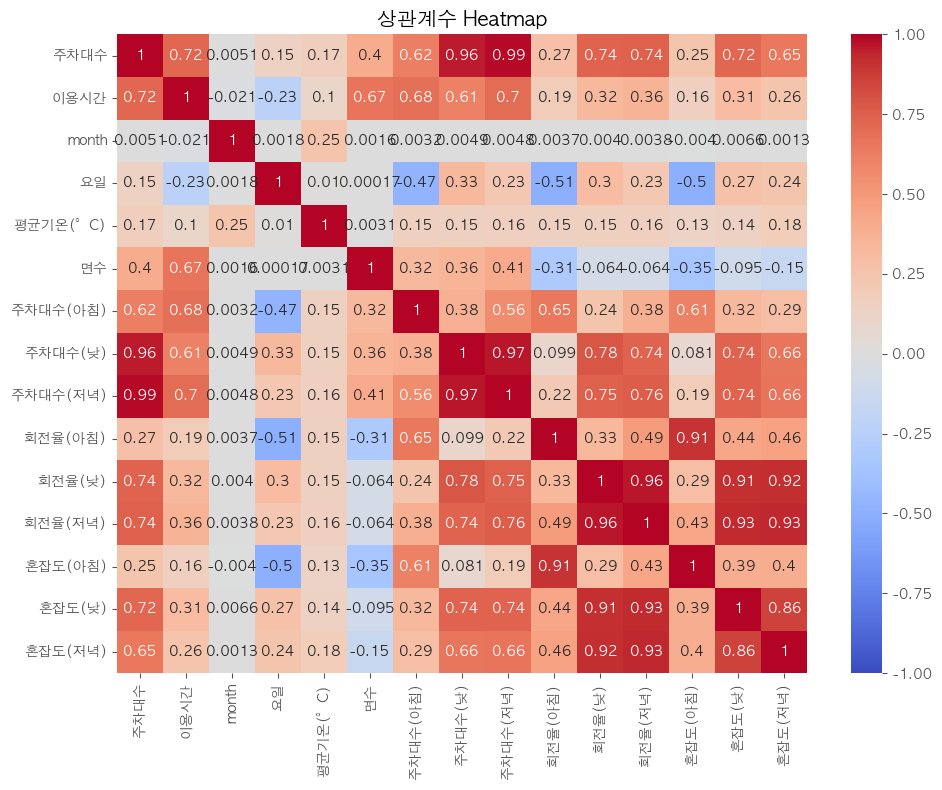

In [140]:
data=yeo_set[['주차대수','이용시간','month','요일','평균기온(°C)','면수','주차대수(아침)','주차대수(낮)','주차대수(저녁)','회전율(아침)','회전율(낮)','회전율(저녁)','혼잡도(아침)','혼잡도(낮)','혼잡도(저녁)']]
corr_matrix=data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, 
            annot=True,      # 각 셀에 숫자 표시
            cmap='coolwarm', # 색상 팔레트
            center=0,        # 0을 중심으로 색상 설정
            vmin=-1, 
            vmax=1)
plt.title('상관계수 Heatmap')
plt.tight_layout()
plt.show()

In [165]:
# yeo_data=yeo_set[['주차장명','주차대수','이용시간','month','요일','평균기온(°C)','최저기온(°C)','최고기온(°C)', '평균 상대습도(%)', '면수']]

# 최고/최저기온, 상대습도 제거  '주차대수','주차대수(아침)','주차대수(낮)','주차대수(저녁)','이용시간'
# yeo_data=yeo_set[['주차장명','주차대수(아침)','주차대수(낮)','주차대수(저녁)','month','요일','평균기온(°C)','면수']]
yeo_data=yeo_set[['주차장명','month','요일','평균기온(°C)','면수']]
yeo_target=yeo_set[['주차대수(아침)','주차대수(낮)','주차대수(저녁)']]

### 아침/낮/저녁의 주차대수는 parameter로 줘야하므로 각 주차장별 시간대별 mean/median/mode 확인한다.

In [142]:
yeo_set.head()

,주차장명,주차대수,이용시간,month,요일,평균기온(°C),최저기온(°C),최고기온(°C),평균 상대습도(%),면수,주차대수(아침),주차대수(낮),주차대수(저녁),회전율(아침),회전율(낮),회전율(저녁),혼잡도(아침),혼잡도(낮),혼잡도(저녁)
0,5,229,22509,11,2,14.4,10.3,21.0,64.0,217,75.57,75.57,75.57,0.116083,0.062187,0.069650,0,0,0
1,2,1934,150135,11,2,14.4,10.3,21.0,64.0,171,135.38,1295.78,483.50,0.263899,1.353154,0.565497,1,3,2
2,1,3398,355119,11,2,14.4,10.3,21.0,64.0,462,237.86,2276.66,849.50,0.171616,0.879971,0.367749,0,3,1
3,4,41,1994,11,2,14.4,10.3,21.0,64.0,141,13.53,13.53,13.53,0.031986,0.017135,0.019191,0,0,0
4,3,2326,318649,11,2,14.4,10.3,21.0,64.0,800,162.82,1558.42,581.50,0.067842,0.347862,0.145375,0,1,0


In [143]:
yeo_set.columns

Index(['주차장명', '주차대수', '이용시간', 'month', '요일', '평균기온(°C)', '최저기온(°C)',
       '최고기온(°C)', '평균 상대습도(%)', '면수', '주차대수(아침)', '주차대수(낮)', '주차대수(저녁)',
       '회전율(아침)', '회전율(낮)', '회전율(저녁)', '혼잡도(아침)', '혼잡도(낮)', '혼잡도(저녁)'],
      dtype='object')

In [144]:
print('mean/median/mode')
for i in range(1, 6):
    print(f"주차장 {i}:")
    for weekday in [0,1,2]:
        for time in ['아침', '낮', '저녁']:
            data = yeo_set.loc[(yeo_set['주차장명'] == i)&(yeo_set['요일'] == weekday), f'주차대수({time})']
            print(f" {weekday}/{time}")
            print(data.mean(),'\t',data.median(),'\t',data.mode().iloc[0])
    print()  # 주차장 간 빈 줄 추가

mean/median/mode
주차장 1:
 0/아침
693.97956 	 658.98 	 487.79999999999995
 0/낮
790.36561 	 750.505 	 555.55
 0/저녁
424.09862 	 402.71000000000004 	 298.1
 1/아침
643.8768 	 625.3800000000001 	 360.92
 1/낮
1034.802 	 1005.075 	 580.0500000000001
 1/저녁
620.8812 	 603.0450000000001 	 348.03000000000003
 2/아침
219.94860887096777 	 216.3 	 77.42
 2/낮
2105.2223991935484 	 2070.3 	 741.0200000000001
 2/저녁
785.530745967742 	 772.5 	 276.5

주차장 2:
 0/아침
358.4523971915747 	 320.4 	 249.48
 0/낮
408.2374523570712 	 364.9 	 284.13
 0/저녁
219.05424272818456 	 195.8 	 152.46
 1/아침
325.03968000000003 	 301.28000000000003 	 172.76000000000002
 1/낮
522.3852 	 484.20000000000005 	 277.65000000000003
 1/저녁
313.4311200000001 	 290.52 	 166.59
 2/아침
100.91624242424244 	 101.99000000000001 	 51.31
 2/낮
965.9126060606061 	 976.19 	 491.11
 2/저녁
360.41515151515154 	 364.25 	 183.25

주차장 3:
 0/아침
414.93520561685057 	 405.0 	 359.64
 0/낮
472.5650952858575 	 461.25 	 409.59
 0/저녁
253.5715145436309 	 247.5 	 219.78
 1/아침
3

> 1~3 주차장의 경우 평일과 금요일에 비해 주말의 이상치가 많고, 평균/중앙값/최반값의 차이가 커서 parameter 값을 결정하기가 어렵다.   
최빈값과 평균값 차이가 2배 이상 나는 주차장들도 있다.

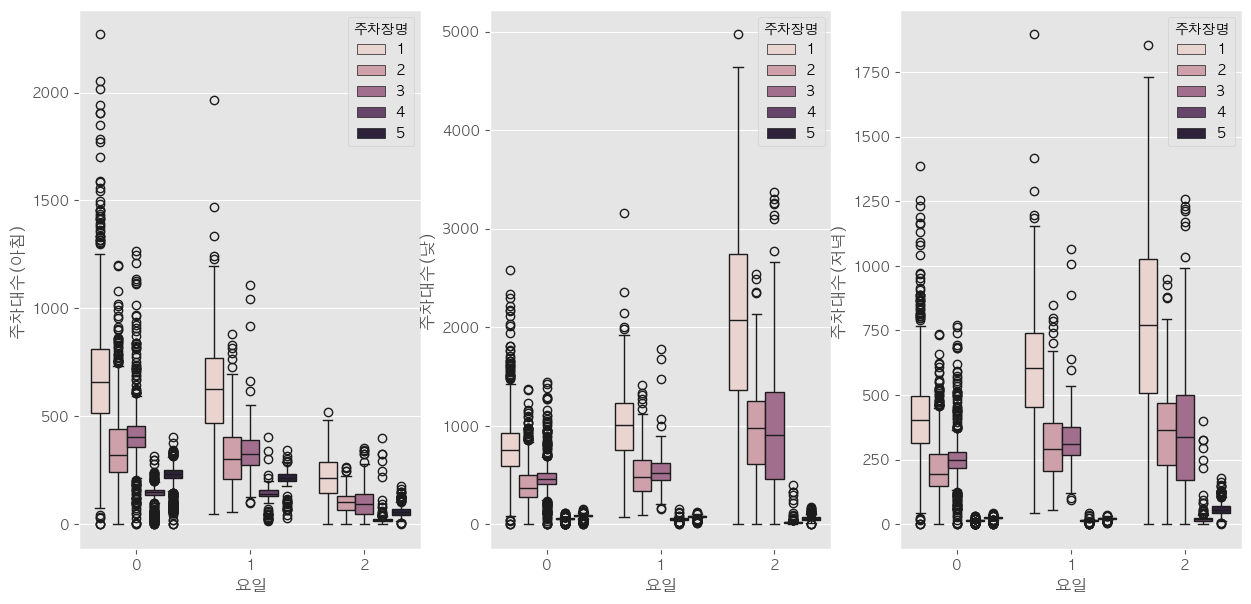

In [145]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.boxplot(
    x='요일',
    y='주차대수(아침)',
    hue='주차장명',
    data=yeo_set,
    ax=ax1
)
sns.boxplot(
    x='요일',
    y='주차대수(낮)',
    hue='주차장명',
    data=yeo_set,
    ax=ax2
)
sns.boxplot(
    x='요일',
    y='주차대수(저녁)',
    hue='주차장명',
    data=yeo_set,
    ax=ax3
)
plt.show()

In [146]:
from sklearn.model_selection import train_test_split

In [187]:
train_input, test_input, train_target, test_target=train_test_split(
                                                                yeo_data,
                                                                yeo_target,
                                                                test_size=0.3,
                                                                random_state=42
)

### MultiOutputClassifier 사용 가능 모델
- Random Forest
- Decision Tree
- SVM
- KNN
- Logistic Regression
- Gradient Boosting
- Multi-layer Perceptron

In [171]:
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import RandomForestRegressor

In [188]:
rf=MultiOutputRegressor(RandomForestRegressor())
rf.fit(train_input, train_target)
rf.score(train_input, train_target)

0.9464339852854469

In [222]:
print(rf.score(train_input, train_target))
print(rf.score(test_input, test_target))

0.9464339852854469
0.7555004322133859


In [190]:
from sklearn.tree import DecisionTreeRegressor
mf = MultiOutputRegressor(DecisionTreeRegressor())
mf.fit(train_input, train_target)
mf.score(train_input, train_target)

0.9701064695092905

In [223]:
print(mf.score(train_input, train_target))
print(mf.score(test_input, test_target))

0.9701064695092905
0.6731348228537121


In [ ]:
# from sklearn.svm import SVC

# msvm=MultiOutputRegressor(SVC())
# msvm.fit(train_input, train_target)
# msvm.score(train_input, train_target)

In [220]:
from sklearn.neighbors import KNeighborsRegressor

mknn=MultiOutputRegressor(KNeighborsRegressor(11))
mknn.fit(train_input, train_target)
mknn.score(train_input, train_target)

0.8174267550414624

In [224]:
print(mknn.score(train_input, train_target))
print(mknn.score(test_input, test_target))

0.8174267550414624
0.768693898832603


In [178]:
from sklearn.linear_model import LogisticRegression

mlr=MultiOutputRegressor(LogisticRegression())
mlr.fit(train_input, train_target)
mlr.score(train_input, train_target)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [156]:
from sklearn.ensemble import GradientBoostingClassifier

mgb=MultiOutputClassifier(GradientBoostingClassifier())
mgb.fit(train_input, train_target)
mgb.score(train_input, train_target)

0.6810195852534562

In [157]:
mgb.score(test_input, test_target)

0.6422811059907834

### test 결과가 좋은 모델
1. Decision Tree
2. Gradient Boosting
3. Random Forest

yeo_data=yeo_set[['주차장명','주차대수','주차대수(아침)','주차대수(낮)','주차대수(저녁)','이용시간','month','요일','평균기온(°C)', '면수']]

In [158]:
from sklearn.metrics import accuracy_score, classification_report

In [159]:
pred=rf.predict(test_input)

In [160]:
print(classification_report(test_target['혼잡도(아침)'], pred[:, 0]))
print(classification_report(test_target['혼잡도(낮)'], pred[:, 1]))
print(classification_report(test_target['혼잡도(저녁)'], pred[:, 2]))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86       672
           1       0.70      0.71      0.71       631
           2       0.47      0.41      0.44       265
           3       0.61      0.68      0.64       168

    accuracy                           0.72      1736
   macro avg       0.66      0.67      0.66      1736
weighted avg       0.72      0.72      0.72      1736

              precision    recall  f1-score   support

           0       0.94      0.94      0.94      1029
           1       0.65      0.66      0.66       341
           2       0.46      0.44      0.45       159
           3       0.72      0.71      0.72       207

    accuracy                           0.81      1736
   macro avg       0.69      0.69      0.69      1736
weighted avg       0.81      0.81      0.81      1736

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1295
           1       0.

In [161]:
pred=mf.predict(test_input)
print(classification_report(test_target['혼잡도(아침)'], pred[:, 0]))
print(classification_report(test_target['혼잡도(낮)'], pred[:, 1]))
print(classification_report(test_target['혼잡도(저녁)'], pred[:, 2]))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       672
           1       0.70      0.68      0.69       631
           2       0.48      0.42      0.44       265
           3       0.61      0.65      0.63       168

    accuracy                           0.71      1736
   macro avg       0.66      0.66      0.66      1736
weighted avg       0.71      0.71      0.71      1736

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1029
           1       0.65      0.65      0.65       341
           2       0.46      0.45      0.45       159
           3       0.76      0.68      0.72       207

    accuracy                           0.81      1736
   macro avg       0.70      0.68      0.69      1736
weighted avg       0.81      0.81      0.81      1736

              precision    recall  f1-score   support

           0       0.92      0.93      0.92      1295
           1       0.

In [162]:
pred=mgb.predict(test_input)
print(classification_report(test_target['혼잡도(아침)'], pred[:, 0]))
print(classification_report(test_target['혼잡도(낮)'], pred[:, 1]))
print(classification_report(test_target['혼잡도(저녁)'], pred[:, 2]))

              precision    recall  f1-score   support

           0       0.89      0.90      0.89       672
           1       0.77      0.79      0.78       631
           2       0.58      0.47      0.52       265
           3       0.66      0.75      0.70       168

    accuracy                           0.78      1736
   macro avg       0.72      0.73      0.72      1736
weighted avg       0.78      0.78      0.78      1736

              precision    recall  f1-score   support

           0       0.96      0.94      0.95      1029
           1       0.70      0.74      0.72       341
           2       0.55      0.53      0.54       159
           3       0.77      0.81      0.79       207

    accuracy                           0.85      1736
   macro avg       0.74      0.75      0.75      1736
weighted avg       0.85      0.85      0.85      1736

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1295
           1       0.

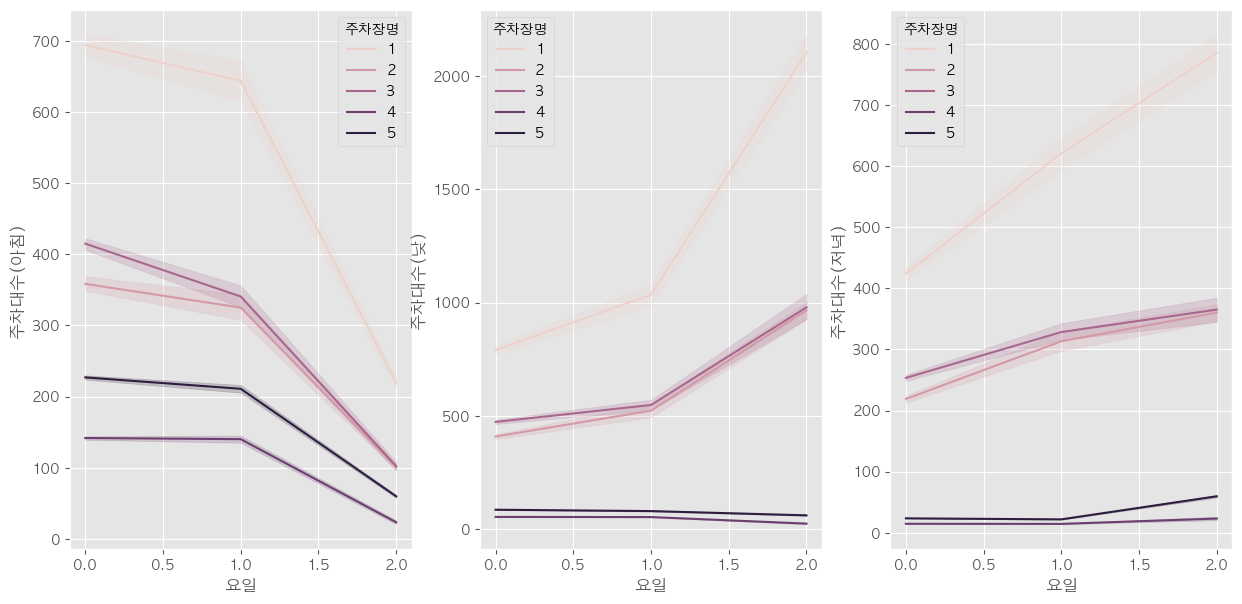

In [163]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.lineplot(
    x='요일',
    y='주차대수(아침)',
    hue='주차장명',
    data=yeo_set,
    ax=ax1
)
sns.lineplot(
    x='요일',
    y='주차대수(낮)',
    hue='주차장명',
    data=yeo_set,
    ax=ax2
)
sns.lineplot(
    x='요일',
    y='주차대수(저녁)',
    hue='주차장명',
    data=yeo_set,
    ax=ax3
)
plt.show()

yeo_data=yeo_set[['주차장명','주차대수(아침)','주차대수(낮)','주차대수(저녁)','month','요일','평균기온(°C)','면수']]

In [164]:
print(rf.predict([[3,324,521,312,11,1,19.4,800]]))

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


ValueError: X has 8 features, but RandomForestClassifier is expecting 5 features as input.

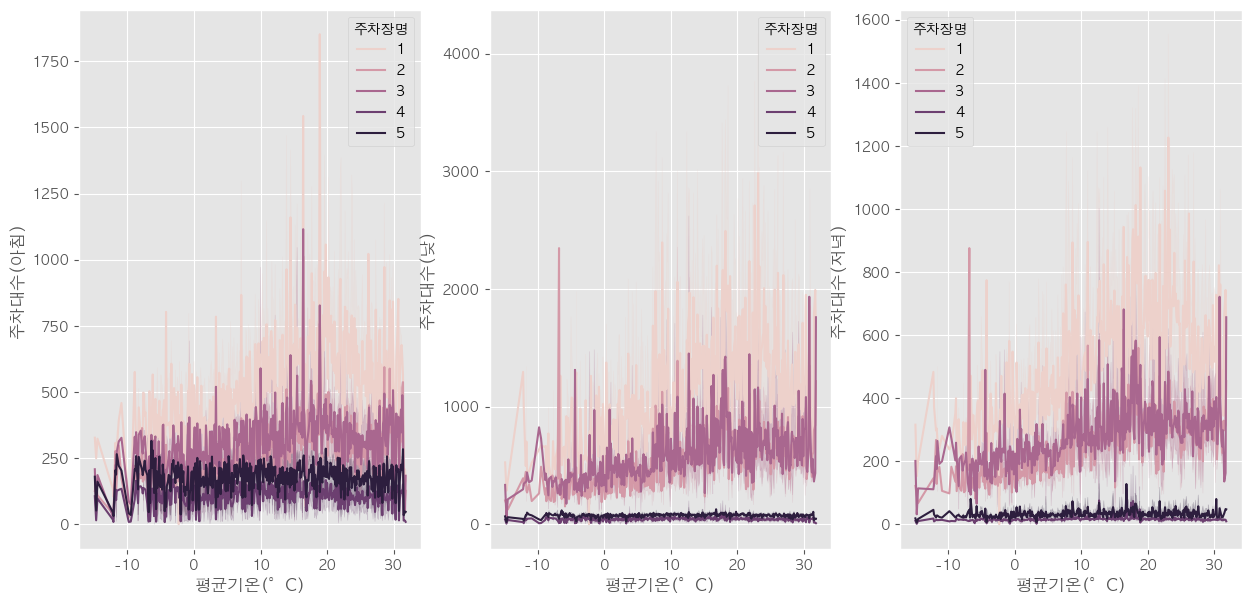

In [ ]:
fig=plt.figure(figsize=(15,7))
ax1=fig.add_subplot(1,3,1)
ax2=fig.add_subplot(1,3,2)
ax3=fig.add_subplot(1,3,3)
sns.lineplot(
    x='평균기온(°C)',
    y='주차대수(아침)',
    hue='주차장명',
    data=yeo_set,
    ax=ax1
)
sns.lineplot(
    x='평균기온(°C)',
    y='주차대수(낮)',
    hue='주차장명',
    data=yeo_set,
    ax=ax2
)
sns.lineplot(
    x='평균기온(°C)',
    y='주차대수(저녁)',
    hue='주차장명',
    data=yeo_set,
    ax=ax3
)
plt.show()

In [ ]:
def average_closest_values(df, pk_name, day, temp_col, curr_temp, target_cols):
    # 주어진 조건을 만족하는 값 필터링
    filtered_df = df[(df['주차장명']==pk_name)&(df['요일']==day)]
    # 입력된 파라미터와의 차이 계산
    differences = np.abs(filtered_df[temp_col] - curr_temp)
    # 차이가 가장 작은 5개의 값 인덱스 선택
    closest_indices = differences.nsmallest(5).index
    
    # 가장 가까운 5개의 값 평균 계산
    average_value = filtered_df.loc[closest_indices, target_cols].mean()
    return average_value

yeo_data=yeo_set[['주차장명','주차대수(아침)','주차대수(낮)','주차대수(저녁)','month','요일','평균기온(°C)','면수']]    
average_closest_values(df, pk_name, day, temp_col, curr_temp, target_cols)      
df:train dataframe, pk_name:주차장명, day:요일, temp_col:평균기온, curr_temp:현재기온, target_cols:주차대수(아침/낮/저녁)

In [ ]:
ex=average_closest_values(yeo_set, 1, 0, '평균기온(°C)', 1.9, ['주차대수(아침)','주차대수(낮)','주차대수(저녁)']).tolist()
rf.predict([[1,ex[0],ex[1],ex[2],11,0,1.9,462]])

/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([[1, 0, 0]])

### 혼잡도를 정량화하여 수치로 판단하기 어렵게 만드는 요인 >> 정기권 영향?
- 2주차장의 경우 실시간 데이터를 확인시 만차인 경우가 매우 많다.
- 2주차장의 주차면수가 상업지구의 다른 주차장(1주차장, 3주차장)에 비해 훨씬 더 적고, 근처에 소규모 아파트 단지가 많은 영향이 있어보인다.(공작아파트의 세대당 주차대수가 0.49대이고, 목화아파트의 새대당 주차대수는 1.35대라고 한다. 근처 아파트 단지에서 정기권 이용?)
- 실제로는 2주차장의 경우 혼잡도가 '만차'가 아닌 '혼잡'이 떠도 만차일 경우가 많다.
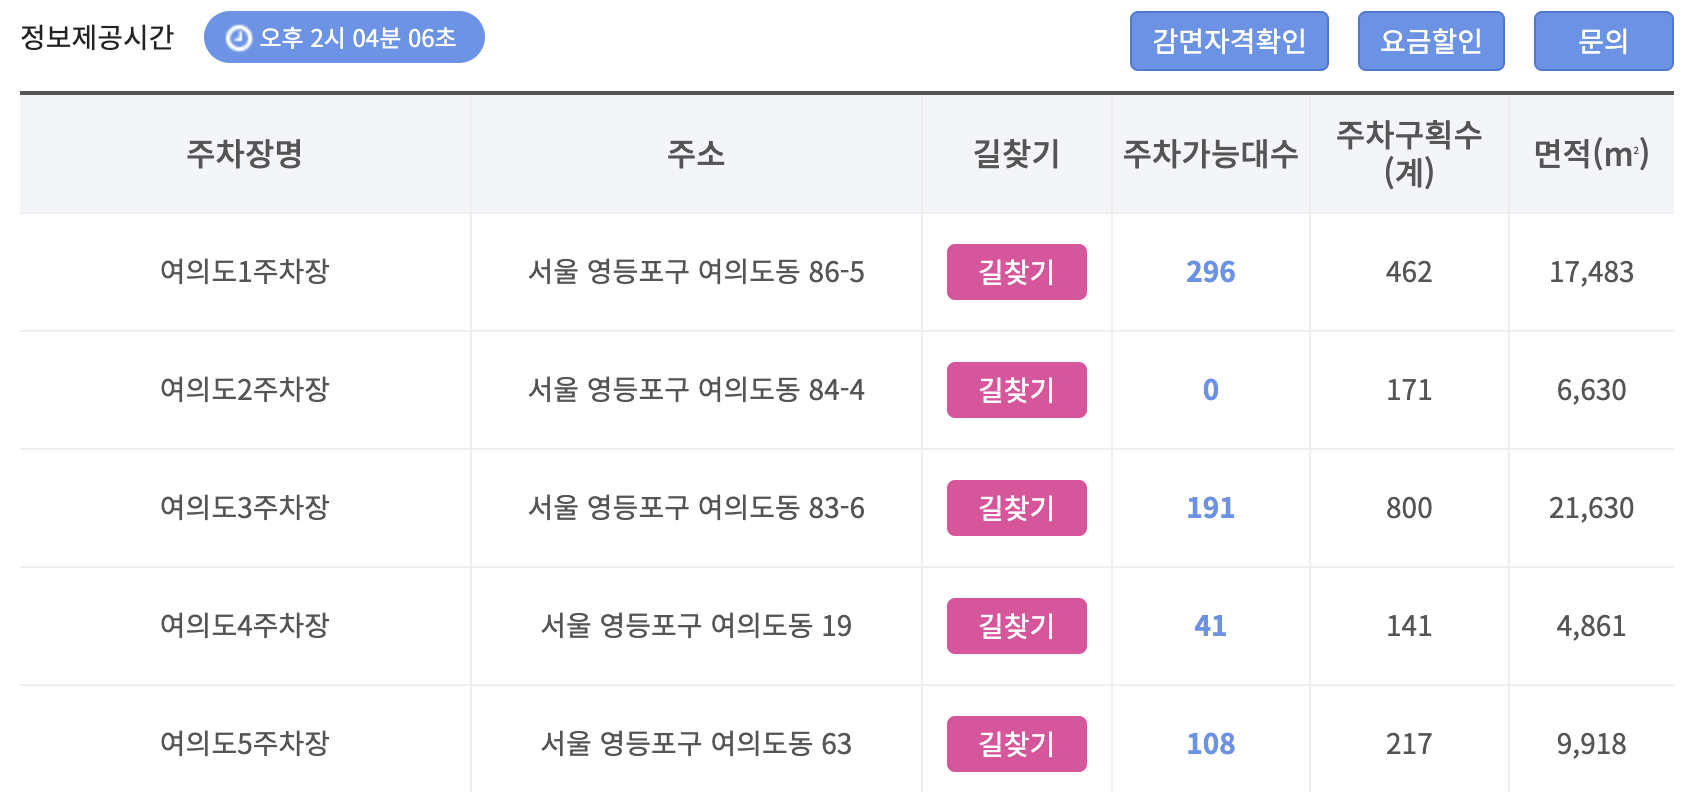

In [ ]:
import joblib

In [ ]:
rf=MultiOutputClassifier(RandomForestClassifier())
rf.fit(yeo_data, yeo_target)
rf.score(yeo_data, yeo_target)

1.0

In [ ]:
filename='../ws/data/rf_yeoui.h5'
joblib.dump(rf, filename)

['../ws/data/rf_yeoui.h5']

In [ ]:
yeo_data.to_csv('../ws/data/1118_yeodata',index=False)

<Axes: xlabel='평균기온(°C)', ylabel='주차대수(낮)'>

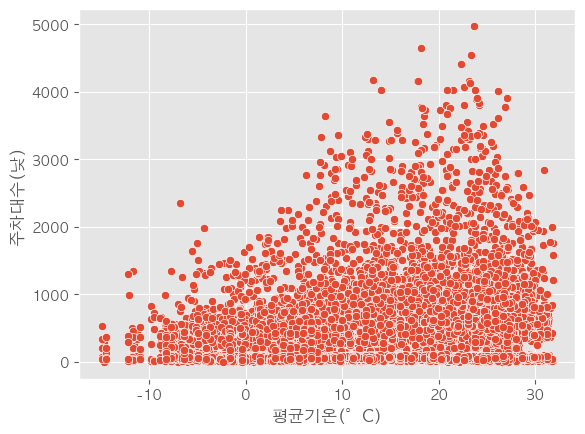

In [ ]:
sns.scatterplot(
    x=yeo_data['평균기온(°C)'],
    y=yeo_data['주차대수(낮)']
)